# Saudi League Analysis
# Part 1: Data Acquisition and Exploring

In [1]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

# Content:
## 0- Acquiring Data
## 1- Load Data
## 2- Clean Data
- League Tables
- League Stats
- Players

## 3- Exploratory Analysis
(*Total number of questions is 18*)
- Teams points for the period 2014-2019
- Remaining teams in the league for the period 2014-2019 2014-2019
- Average teams points for the period 2014-2019
- Top scorers per team for the period 2014-2019
- Top scorers ratio per team for the period 2014-2019
- Top scorers total goals and goals ratio per played match for the period 2014-2019
- Top scorers per team per year
- League winner stats per year
- Number of Saudi player per team
- Top 5 players nationality for the period 2014-2019
- Top 5 players nationality per team per year
- Average age per team
- Average Saudi age per team
- Average non-Saudi age per team
- Total number of positions per team
- Total number of positions per team per year
- Total number of penalties per team per year
- Total number of penalties per team for the period 2014-2019

## 4- Save Data



===================================

## 0- Acquiring Data

#### This data was collected from FBREF website for the seasons from 2014 until 2019.
https://fbref.com/en/comps/70/749/stats/2014-2015-Saudi-Professional-League-Stats

# 1- Load Data

In [2]:
league_tables = pd.read_csv('league_tables.csv')
league_stats = pd.read_csv('League_stats.csv')
players = pd.read_csv('players.csv')

In [3]:
league_tables.head()

year  Rk        Squad  MP   W  D   L  GF  GA  GDiff  Pts Attendance  \
0  2019   1     Al-Hilal  30  22  6   2  74  26     48   72     10,683   
1  2019   2     Al-Nassr  30  19  7   4  60  26     34   64      8,923   
2  2019   3      Al-Ahli  30  15  5  10  49  36     13   50     10,244   
3  2019   4     Al-Wehda  30  16  1  13  45  40      5   49      6,703   
4  2019   5   Al-Faisaly  30  14  6  10  41  36      5   48      2,459   

             Top Team Scorer          Goalkeeper Notes  
0       Bafétimbi Gomis - 27  Abdullah Al-Mayouf   NaN  
1  Abderrazak Hamdallah - 29          Brad Jones   NaN  
2         Omar Al Somah - 19  Yasser Al Mosailem   NaN  
3      Youssouf Niakaté - 16  Abdullah Al Jadani   NaN  
4       Youssef El Jebli - 9   Mustafa Malayekah   NaN

In [4]:
league_stats.head()

year  Champion             mostGoals  noGoals  \
0  2014  Al-Nassr         Omar Al Somah       22   
1  2015   Al-Ahli         Omar Al Somah       27   
2  2016  Al-Hilal         Omar Al Somah       24   
3  2017  Al-Hilal     Ronnie Fernández        13   
4  2018  Al-Nassr  Abderrazak Hamdallah       34   

                             mostAssists  noAssists  \
0  Jehad Al-Hussain, Adrian Mierzejewski          6   
1                       Jehad Al-Hussain         10   
2                     Carlos Villanueva          11   
3                      Jehad Al-Hussain           9   
4   Nordin Amrabat, Abderrazak Hamdallah          9   

                         mostCleanSheets  noCleanSheets  
0                      Abdullah Al-Enezi             10  
1  Khalid Sharahili, Yasser Al Mosailem              10  
2                    Abdullah Al-Mayouf              13  
3                          Ali Al-Mazidi              8  
4               Brad Jones, Maksym Koval             11

In [5]:
players.head()

Player  Nation Pos       Squad   Age    Born  MP  Starts  \
0   Abdulaziz Al-Aazmi  sa KSA  MF      Najran  23.0  1991.0   3       3   
1          Ahmed Abbas  sa KSA  MF    Al-Nassr  29.0  1984.0   1       0   
2        Hadi Al Abbas  sa KSA  MF  Al-Khaleej  28.0  1985.0  11       8   
3        Issa Al Abbas  sa KSA  DF  Al-Khaleej  31.0  1982.0  13      10   
4  Mohamed Abdel-Shafy  eg EGY  DF     Al-Ahli  29.0  1985.0  17      17   

     Min  Gls  ...  PK  PKatt  CrdY  CrdR  Gls_90  Ast_90    GA  G_PK  GA_PK  \
0    270    0  ...   0      0     1     0     0.0    0.00  0.00   0.0   0.00   
1     45    0  ...   0      0     0     0     0.0    0.00  0.00   0.0   0.00   
2    708    0  ...   0      0     3     0     0.0    0.00  0.00   0.0   0.00   
3    977    0  ...   0      0     0     0     0.0    0.00  0.00   0.0   0.00   
4  1,526    0  ...   0      0     0     0     0.0    0.12  0.12   0.0   0.12   

   year  
0  2014  
1  2014  
2  2014  
3  2014  
4  2014  

[5 rows x 21 columns]

# 2- Clean Data

### I) Leauge Table

In [6]:
league_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             88 non-null     int64 
 1   Rk               88 non-null     int64 
 2   Squad            88 non-null     object
 3   MP               88 non-null     int64 
 4   W                88 non-null     int64 
 5   D                88 non-null     int64 
 6   L                88 non-null     int64 
 7   GF               88 non-null     int64 
 8   GA               88 non-null     int64 
 9   GDiff            88 non-null     int64 
 10  Pts              88 non-null     int64 
 11  Attendance       88 non-null     object
 12  Top Team Scorer  88 non-null     object
 13  Goalkeeper       88 non-null     object
 14  Notes            39 non-null     object
dtypes: int64(10), object(5)
memory usage: 10.4+ KB


In [7]:
league_tables.Attendance.head()

0    10,683
1     8,923
2    10,244
3     6,703
4     2,459
Name: Attendance, dtype: object

In [8]:
# Convert Attendance data type to integer
league_tables.Attendance = league_tables.Attendance.apply(lambda x: int(x.replace(',','')))

In [9]:
league_tables.Attendance.head()

0    10683
1     8923
2    10244
3     6703
4     2459
Name: Attendance, dtype: int64

In [10]:
league_tables['Top Team Scorer']

0                        Bafétimbi Gomis - 27
1                   Abderrazak Hamdallah - 29
2                          Omar Al Somah - 19
3                       Youssouf Niakaté - 16
4                        Youssef El Jebli - 9
5                        Mohamed Fouzair - 10
6                        Cristian Guanca - 11
7                              Filip Kiss - 7
8                             Saad Bguir - 12
9                          Emilio Zelaya - 13
10                             Romarinho - 15
11                           Héldon Ramos - 7
12                     Mitchell te Vrede - 12
13         Samuel Owusu, Ronnie Fernández - 7
14                     Carlos Strandberg - 13
15               Carolus Andriamatsinoro - 10
16                  Abderrazak Hamdallah - 34
17                       Bafétimbi Gomis - 21
18                       Léandre Tawamba - 21
19                               Djaniny - 20
20                     Constantin Budescu - 7
21                              Ro

In [11]:
# Remove the dash '-' form family names
league_tables['Top Team Scorer'] = league_tables['Top Team Scorer'].apply(lambda x: x.replace('Al-','Al')
                                                                          .replace('El ', 'El')
                                                                          .replace('...','')
                                                                          .replace('Al ','Al')
                                                                          .replace('l-A','lA'))

# Split top scorers and their scores 
league_tables['Top Team Scorer'] = league_tables['Top Team Scorer'].apply(lambda x: re.split(r'[-,]',x))

# Remove whitespaces
league_tables['Top Team Scorer'] = league_tables['Top Team Scorer'].apply(lambda x: [w.strip() for w in x])

In [12]:
# Create new columns for the number of goals
league_tables['Top Team Scorer Goals'] = [int(i[-1]) for i in league_tables['Top Team Scorer']]

# Delate the number of goals from the old columns
league_tables['Top Team Scorer'] = [i[:-1] for i in league_tables['Top Team Scorer']]

In [13]:
# Remove whihtespaces from Squad
league_tables.Squad = league_tables.Squad.str.strip()

### II) League Stats

In [14]:
league_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             6 non-null      int64 
 1   Champion         6 non-null      object
 2   mostGoals        6 non-null      object
 3   noGoals          6 non-null      int64 
 4   mostAssists      6 non-null      object
 5   noAssists        6 non-null      int64 
 6   mostCleanSheets  6 non-null      object
 7   noCleanSheets    6 non-null      int64 
dtypes: int64(4), object(4)
memory usage: 512.0+ bytes


In [15]:
# Remove the dash '-' form family names and whitespaces

# Most Goals
league_stats.mostGoals = league_stats.mostGoals.apply(lambda x: x.replace('Al ','Al'))
league_stats.mostGoals = league_stats.mostGoals.apply(lambda x: x.strip())

# Most Assists
league_stats.mostAssists = league_stats.mostAssists.apply(lambda x: x.replace('Al ','Al')
                                                         .replace('Al-','Al')
                                                         .replace('El ', 'El'))

league_stats.mostAssists = league_stats.mostAssists.apply(lambda x: x.strip().split(','))

# Most Clean sheets
league_stats.mostCleanSheets = league_stats.mostCleanSheets.apply(lambda x: x.replace('Al ','Al')
                                                                 .replace('Al-','Al'))

league_stats.mostCleanSheets = league_stats.mostCleanSheets.apply(lambda x: x.strip().split(','))

league_stats

year  Champion             mostGoals  noGoals  \
0  2014  Al-Nassr          Omar AlSomah       22   
1  2015   Al-Ahli          Omar AlSomah       27   
2  2016  Al-Hilal          Omar AlSomah       24   
3  2017  Al-Hilal      Ronnie Fernández       13   
4  2018  Al-Nassr  Abderrazak Hamdallah       34   
5  2019  Al-Hilal  Abderrazak Hamdallah       29   

                               mostAssists  noAssists  \
0  [Jehad AlHussain,  Adrian Mierzejewski]          6   
1                        [Jehad AlHussain]         10   
2                      [Carlos Villanueva]         11   
3                        [Jehad AlHussain]          9   
4  [Nordin Amrabat,  Abderrazak Hamdallah]          9   
5                        [Youssef ElJebli]         12   

                          mostCleanSheets  noCleanSheets  
0                      [Abdullah AlEnezi]             10  
1  [Khalid Sharahili,  Yasser AlMosailem]             10  
2                     [Abdullah AlMayouf]             13  
3                          [Ali AlMazidi]              8  
4             [Brad Jones,  Maksym Koval]             11  
5                            [Brad Jones]             12

### III) Players

In [16]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733 entries, 0 to 2732
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2733 non-null   object 
 1   Nation  2733 non-null   object 
 2   Pos     2733 non-null   object 
 3   Squad   2733 non-null   object 
 4   Age     2661 non-null   float64
 5   Born    2661 non-null   float64
 6   MP      2733 non-null   int64  
 7   Starts  2733 non-null   int64  
 8   Min     2733 non-null   object 
 9   Gls     2733 non-null   int64  
 10  Ast     2733 non-null   int64  
 11  PK      2733 non-null   int64  
 12  PKatt   2733 non-null   int64  
 13  CrdY    2733 non-null   int64  
 14  CrdR    2733 non-null   int64  
 15  Gls_90  2733 non-null   float64
 16  Ast_90  2733 non-null   float64
 17  GA      2733 non-null   float64
 18  G_PK    2733 non-null   float64
 19  GA_PK   2733 non-null   float64
 20  year    2733 non-null   int64  
dtypes: float64(7), int64(9), object(5)
me

In [17]:
# Drop Nan value
players.dropna(inplace=True)

# Convert Min data type to integer
players.Min = players.Min.apply(lambda x: int(x.replace(',','')))

In [18]:
players.Pos.unique()

array(['MF', 'DF', 'GK,MF', 'GK', 'FW,MF', 'DF,MF', 'FW', 'DF,FW',
       'MF,DF', 'MF,FW'], dtype=object)

In [19]:
# Keep the first postion only (for simplicity)
players.Pos = players.Pos.apply(lambda x: x.split(',')[0])

In [20]:
players.Nation.unique()

array(['sa\xa0KSA', 'eg\xa0EGY', 'jo\xa0JOR', 'gh\xa0GHA', 'bh\xa0BHR',
       'cm\xa0CMR', 'br\xa0BRA', 'me\xa0MNE', 'bo\xa0BOL', 'dz\xa0ALG',
       'kr\xa0KOR', 'sy\xa0SYR', 'sn\xa0SEN', 'ml\xa0MLI', 'bf\xa0BFA',
       'uy\xa0URU', 'cd\xa0COD', 'hr\xa0CRO', 'ma\xa0MAR', 'gm\xa0GAM',
       'ci\xa0CIV', 'pl\xa0POL', 'kw\xa0KUW', 'ps\xa0PLE', 'ng\xa0NGA',
       'ke\xa0KEN', 'co\xa0COL', 'ro\xa0ROU', 'es\xa0ESP', 'iq\xa0IRQ',
       'lb\xa0LIB', 'gr\xa0GRE', 'gn\xa0GUI', 'ec\xa0ECU', 'se\xa0SWE',
       'gq\xa0EQG', 'gw\xa0GNB', 'rs\xa0SRB', 'tn\xa0TUN', 'pt\xa0POR',
       've\xa0VEN', 'om\xa0OMA', 'tg\xa0TOG', 'am\xa0ARM', 'pr\xa0PUR',
       'de\xa0GER', 'sl\xa0SLE', 'au\xa0AUS', 'fr\xa0FRA', 'tl\xa0TLS',
       'py\xa0PAR', 'ar\xa0ARG', 'cf\xa0CTA', 'mr\xa0MTN', 'st\xa0STP',
       'hn\xa0HON', 'cl\xa0CHI', 'km\xa0COM', 'no\xa0NOR', 'bi\xa0BDI',
       'mg\xa0MAD', 'ne\xa0NIG', 'ly\xa0LBY', 'cv\xa0CPV', 'tt\xa0TRI',
       'cr\xa0CRC', 'lr\xa0LBR', 'sk\xa0SVK', 'zw\xa0ZIM', 'zm\x

In [21]:
# Keep the 3 letters country code and remove whitespaces
players.Nation = players.Nation.apply(lambda x: x.split()[-1].strip())

In [22]:
players.Player = players.Player.apply(lambda x: x.replace('Al-','Al')
                                      .replace('Al ','Al')
                                      .replace('l-A','lA')
                                      .replace('El ', 'El'))

In [23]:
players

Player Nation Pos       Squad   Age    Born  \
0                    Abdulaziz AlAazmi    KSA  MF      Najran  23.0  1991.0   
1                          Ahmed Abbas    KSA  MF    Al-Nassr  29.0  1984.0   
2                         Hadi AlAbbas    KSA  MF  Al-Khaleej  28.0  1985.0   
3                         Issa AlAbbas    KSA  DF  Al-Khaleej  31.0  1982.0   
4                  Mohamed Abdel-Shafy    EGY  DF     Al-Ahli  29.0  1985.0   
5                       Omar Abdulaziz    KSA  GK  Al-Faisaly  30.0  1983.0   
6                   Hussein Abdulghani    KSA  DF    Al-Nassr  37.0  1977.0   
7                  Abdullah ElAbdullah    KSA  DF    Al-Fateh  29.0  1985.0   
8                      Waleed Abdullah    KSA  GK   Al-Shabab  28.0  1986.0   
9                         Nawaf AlAbed    KSA  FW    Al-Hilal  24.0  1990.0   
10                     Ahmed Abo Obaid    KSA  MF    Al-Fateh  29.0  1984.0   
11               Abdulaziz Abo Shaqraa    KSA  DF    Al-Fateh  32.0  1981.0   
12                  Mohammed Abousaban    KSA  MF  Al-Ittihad  24.0  1990.0   
13                        Talal AlAbsi    KSA  DF  Al-Ittihad  21.0  1993.0   
14                 Shadi Abu Hash'hash    JOR  DF  Al-Taawoun  33.0  1981.0   
15                         Ahmed Adams    GHA  DF  Al-Shoulla  21.0  1993.0   
16                       Shareef Adnan    JOR  DF  Al-Khaleej  30.0  1984.0   
17                       Mishel AlAgmi    KSA  DF  Al-Shoulla  22.0  1992.0   
18                  Abdulrahman Aharib    KSA  MF       Hajer  22.0  1991.0   
19                       Sadiq AlAhmed    KSA  DF    Al-Fateh  22.0  1992.0   
20                       Younes Alaiwi    KSA  FW  Al-Shoulla  24.0  1990.0   
21                       Basem Alatala    KSA  GK  Al-Taawoun  24.0  1989.0   
22                    Hussain Ali Baba    BHR  DF    Al-Fateh  32.0  1982.0   
23                     Burj Ali Maodah    KSA  FW  Al-Shoulla  31.0  1982.0   
24                 Shaye Ali Sharahili    KSA  MF    Al-Nassr  24.0  1990.0   
25                          Paul Alo'o    CMR  FW  Al-Taawoun  30.0  1983.0   
26                             Aloísio    BRA  MF       Hajer  29.0  1985.0   
27                       Mohammed Aman    KSA  DF     Al-Ahli  25.0  1988.0   
28                   Abdulellah AlAmer    KSA  DF  Al-Faisaly  24.0  1990.0   
29                            Odai Amr    KSA  DF       Hajer  26.0  1987.0   
30                        Majed AlAmri    KSA  DF  Al-Shoulla  28.0  1985.0   
31                     Mohammed AlAmri    KSA  DF     Al-Raed  22.0  1991.0   
32                          Andrezinho    BRA  FW  Al-Shoulla  24.0  1990.0   
33                          John Antwi    GHA  FW   Al-Shabab  21.0  1992.0   
34                       Ahmed AlAoufi    KSA  MF     Al-Ahli  22.0  1992.0   
35                       Saleh AlArfej    KSA  FW       Hajer  19.0  1994.0   
36                   Abdulfattah Asiri    KSA  MF  Al-Ittihad  20.0  1994.0   
37                    Mubarak AlAsmari    KSA  MF    Al-Fateh  27.0  1987.0   
38                  Abdulmohsen Assiri    KSA  MF     Al-Raed  24.0  1990.0   
39                        Ahmed Assiri    KSA  DF  Al-Ittihad  22.0  1991.0   
40                     Muhannad Assiri    KSA  FW     Al-Ahli  27.0  1986.0   
41                     Abdullah AlAsta    KSA  DF   Al-Shabab  28.0  1986.0   
42                           Ali Ataif    KSA  MF   Al-Orobah  27.0  1987.0   
43                     Basim AlAtallah    KSA  GK  Al-Taawoun  24.0  1989.0   
44                         Muhand Awad    KSA  FW   Al-Orobah  22.0  1992.0   
45                      Abdullah Awaji    KSA  MF  Al-Faisaly  20.0  1994.0   
46                        Mohamed Awal    GHA  DF   Al-Shabab  26.0  1988.0   
47                       Fares AlAyyaf    KSA  MF     Al-Raed  22.0  1992.0   
48                      Hattan Bahebri    KSA  MF  Al-Khaleej  22.0  1992.0   
49                     Jamal Bajandouh    KSA  MF  Al-Ittihad  21.0  1992.0   
50 

#  3- Exploratory Analysis

In [24]:
# Set parameters for graphing
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.markerscale'] = 1.5

# Color
all_colors = {'Al-Hilal':'#032e91', 
          'Al-Nassr':'#c97600', 
          'Al-Ahli':'#089103', 
          'Al-Wehda':'#b00000', 
         'Al-Faisaly': '#5c0000',
         'Al-Raed': '#7a0000',
         'Al-Shabab': '#000000',
         'Al-Ettifaq': '#60b043',
         'Abha': '#ff963b',
         'Damac': '#613e1f',
         'Al-Ittihad': '#e0b000',
         'Al-Taawoun': '#b0965a',
         'Al-Fateh': '#5a7eb0',
         'Al-Fayha': '#02214d',
         'Al-Hazem': '#490059',
         'Al-Adalah': '#ad398b',
         'Al-Qadsiah':'#d44866' ,
         'Al-Batin': '#575757',
         'Ohod': '#81ab67',
         'Al-Khaleej': '#498f6c',
         'Najran': '#20b074',
         'Hajer': '#73c5ff',
         'Al-Shoulla': '#69164e',
         'Al-Orobah': '#5b6e75'}

top_colors = {'Al-Hilal':'#032e91', 
          'Al-Nassr':'#c97600', 
          'Al-Ahli':'#089103', 
          'Al-Raed':'#b00000', 
         'Al-Shabab': '#000000',
         'Al-Ittihad': '#e0b000',
         'Al-Taawoun': '#70b858',
         'Al-Fateh': '#73c5ff',
         'Al-Fayha': '#02214d'}


# Set Color
sns.set_palette(sns.color_palette(all_colors.values()))


# =====================================
# Helper functions:

# Credit: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                if ~np.isnan(p.get_height()):
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + float(space)
#                     value = float(p.get_height())
                    value = float('{:.2f}'.format(p.get_height()))
                    ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                if ~np.isnan(p.get_width()):
                    _x = p.get_x() + p.get_width() + float(space)
                    _y = p.get_y() + p.get_height()
                    value = float('{:.2f}'.format(p.get_width()))
                    ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

        
# Credit: https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot
def change_width(ax, new_value, h_v='v') :
    for patch in ax.patches :
        if (h_v=='v'):
            current_width = patch.get_height()
            diff = current_width - new_value

            # we change the bar width
            patch.set_height(new_value)

            # we recenter the bar
            patch.set_x(patch.get_x() + diff * .5)
            
        if  (h_v=='h'):           
            current_width = patch.get_widht()
            diff = current_width - new_value

            # we change the bar width
            patch.set_width(new_value)

            # we recenter the bar
            patch.set_x(patch.get_x() + diff * .5)

#### 1- Teams points for the period 2014-2019

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


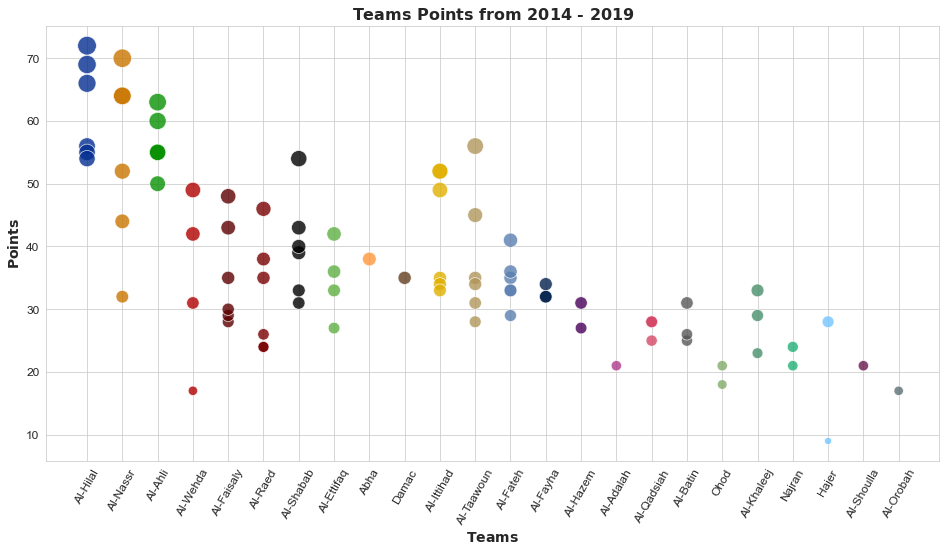

In [25]:
sns.scatterplot(data=league_tables, x='Squad',y='Pts', hue='Squad', 
                    size='Pts', sizes=(50,350), legend=False, alpha=0.8);

plt.xticks(rotation=60);
plt.title('$Teams$ Points from 2014 - 2019', fontsize=16);
plt.xlabel('$Teams$', fontsize=14);
plt.ylabel('$Points$', fontsize=14);

#### 2- Remaining teams in the league for the period 2014-2019

In [26]:
remaining_teams = []
for s in league_tables.Squad.unique():
    if(league_tables[league_tables.Squad == s].shape[0]>5):
        remaining_teams.append(s)

print('Number of remaining teams is: ',len(remaining_teams),'\n')
print(remaining_teams)

Number of remaining teams is:  9 

['Al-Hilal', 'Al-Nassr', 'Al-Ahli', 'Al-Faisaly', 'Al-Raed', 'Al-Shabab', 'Al-Ittihad', 'Al-Taawoun', 'Al-Fateh']


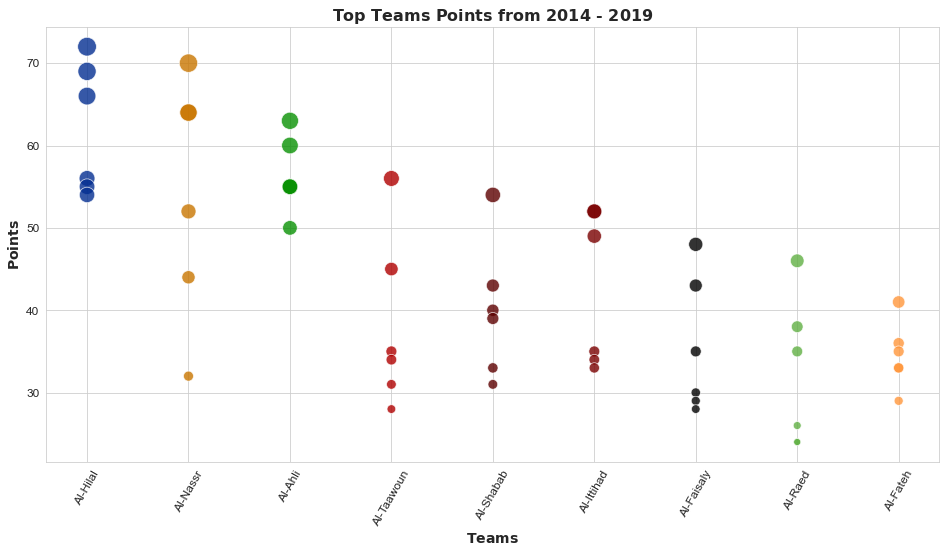

In [27]:
top_teams = league_tables[league_tables.Squad.isin(remaining_teams)].sort_values(by='Pts',ascending = False)

sns.scatterplot(data=top_teams, x='Squad',y='Pts', hue='Squad', 
                    size='Pts', sizes=(50,350), legend=False, alpha=0.8);

plt.xticks(rotation=60);
plt.title('Top $Teams$ Points from 2014 - 2019', fontsize=16);
plt.xlabel('$Teams$', fontsize=14);
plt.ylabel('$Points$', fontsize=14);

#### 3- Average teams points for the period 2014-2019

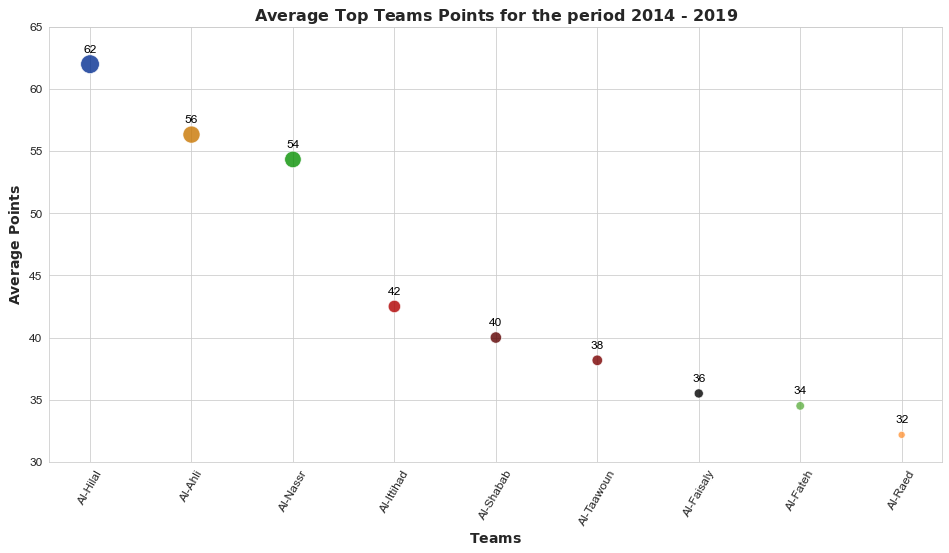

In [28]:
ave_top_team = top_teams.groupby(['Squad'], as_index=False)['Pts'].mean().sort_values(by='Pts',ascending = False)

av = sns.scatterplot(data=ave_top_team, x='Squad', y='Pts', hue='Squad',
               size='Pts', sizes=(50,350), legend=False, alpha=0.8);

for i in range(0,ave_top_team.shape[0]):
     av.text(ave_top_team.Squad[i], ave_top_team.Pts[i]+1.2, str(int(round(ave_top_team.Pts[i]))),
             horizontalalignment='center',verticalalignment='center',
             size='medium', color='black')

plt.xticks(rotation=60);
plt.title('Average Top $Teams$ Points for the period 2014 - 2019', fontsize=16);
plt.xlabel('$Teams$', fontsize=14);
plt.ylabel('Average $Points$', fontsize=14);
plt.ylim(30,65);

In [29]:
ave_top_team.round()

Squad   Pts
3    Al-Hilal  62.0
0     Al-Ahli  56.0
5    Al-Nassr  54.0
4  Al-Ittihad  42.0
7   Al-Shabab  40.0
8  Al-Taawoun  38.0
1  Al-Faisaly  36.0
2    Al-Fateh  34.0
6     Al-Raed  32.0

#### 4- Top scorers per team for the period 2014-2019

In [30]:
# Credit: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
import operator
from functools import reduce
def get_overall_top_scorer(t):
    s_list = top_teams[(top_teams.Squad == t)]['Top Team Scorer']
    name = set(reduce(lambda x,y: x+y,s_list))
    p = players[players.Player.isin(name)].groupby('Player', as_index=False)['Gls'].sum()
    p['Squad'] = t
    return p.sort_values(by='Gls',ascending=False).reset_index(drop=True)

# Collect top sorers for each team
hilal_scorers = get_overall_top_scorer(top_teams.Squad.unique()[0])
nassr_scorers = get_overall_top_scorer(top_teams.Squad.unique()[1])
ahli_scorers = get_overall_top_scorer(top_teams.Squad.unique()[2])
taawon_scorers = get_overall_top_scorer(top_teams.Squad.unique()[3])
shabab_scorers = get_overall_top_scorer(top_teams.Squad.unique()[4])
ittihad_scorers = get_overall_top_scorer(top_teams.Squad.unique()[5])
faisaly_scorers = get_overall_top_scorer(top_teams.Squad.unique()[6])
raed_scorers = get_overall_top_scorer(top_teams.Squad.unique()[7])
fateh_scorers = get_overall_top_scorer(top_teams.Squad.unique()[8])

# list of teams names
t_list = [hilal_scorers, nassr_scorers,ahli_scorers,taawon_scorers,
         shabab_scorers, ittihad_scorers, faisaly_scorers, raed_scorers,  fateh_scorers]

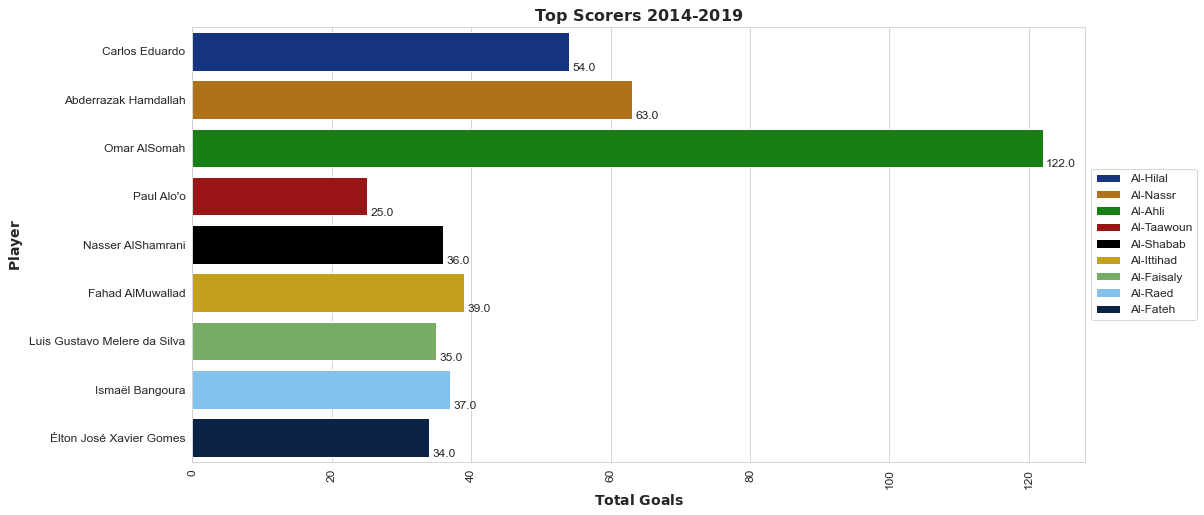

In [31]:
# Create empty dataframe
top_teams_scorers = pd.DataFrame(columns=['Player','Gls','Squad'])

# Append only top team scorer to the dataframe
for t in t_list:
    top_teams_scorers = top_teams_scorers.append(t.loc[0],ignore_index=True) 
top_teams_scorers = top_teams_scorers.reset_index(drop=True)

# Plot top Scorer
fig, ax = plt.subplots()
sns.set_palette(sns.color_palette(top_colors.values()))
sns.barplot(data=top_teams_scorers, y='Player', x='Gls', hue='Squad', dodge=False);
plt.title('$Top$ Scorers 2014-2019', fontsize=16);
plt.ylabel('$Player$', fontsize=14);
plt.xlabel('Total $Goals$', fontsize=14);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
show_values_on_bars(ax, 'h', 0.5)

#### 5- Top scorers ratio per team for the period 2014-2019

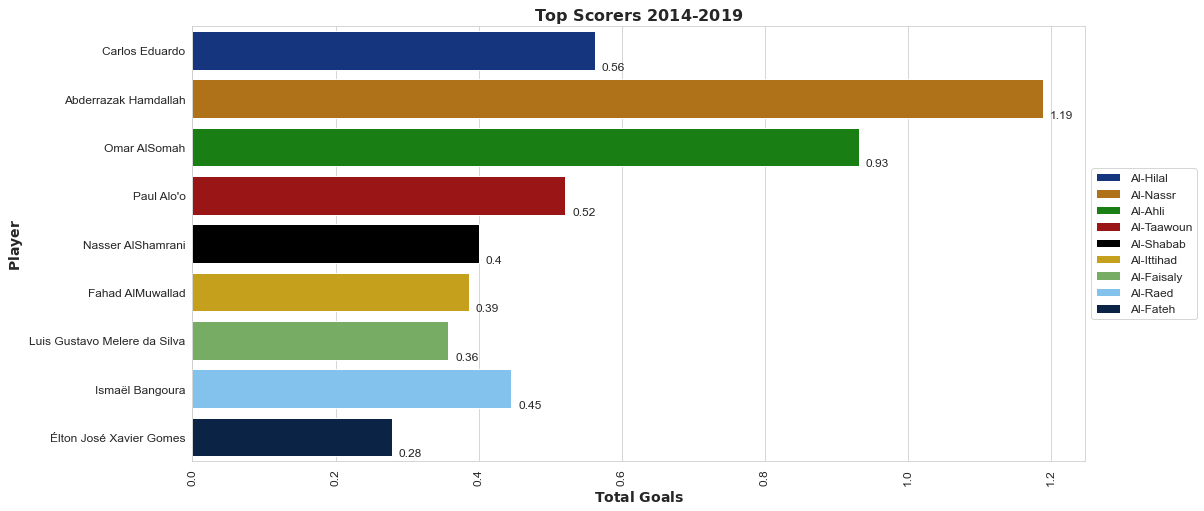

In [32]:
# Create empty dataframe
top_teams_scorers_ratio = pd.DataFrame(columns=['Player','MP','Gls'])

# Calculate top team scorer ratio and append to the dataframe
for name in top_teams_scorers.Player:
    cc = players.groupby('Player', as_index=False)[['MP','Gls']].sum()
    top_teams_scorers_ratio = top_teams_scorers_ratio.append(cc[cc.Player == name],ignore_index=True)
    cc.reset_index(drop=True)
    
top_teams_scorers_ratio['ratio'] = top_teams_scorers_ratio.Gls / top_teams_scorers_ratio.MP
top_teams_scorers_ratio = pd.concat([top_teams_scorers.Squad,top_teams_scorers_ratio], axis=1)

# Plot top scorer ratio
fig, ax2 = plt.subplots()
sns.set_palette(sns.color_palette(top_colors.values()))
sns.barplot(data=top_teams_scorers_ratio, y='Player', x='ratio', hue='Squad', dodge=False);
plt.title('$Top$ Scorers 2014-2019', fontsize=16);
plt.ylabel('$Player$', fontsize=14);
plt.xlabel('Total $Goals$', fontsize=14);
plt.xticks(rotation=90);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
show_values_on_bars(ax2, 'h', 0.01)

#### 6- Top scorers total goals and goals ratio per played match for the period 2014-2019

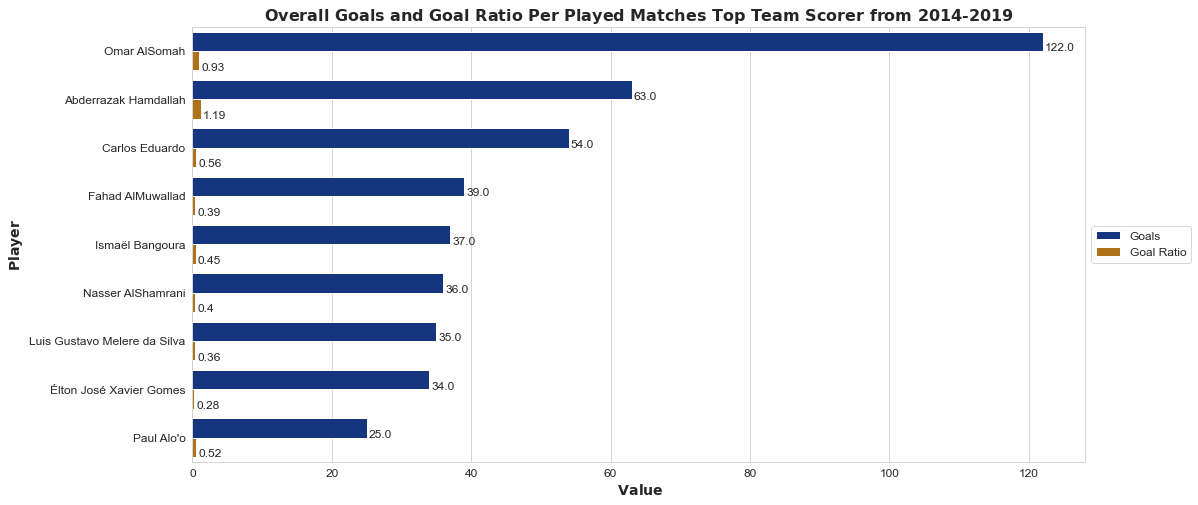

In [33]:
top_teams_scorers_ratio.rename(columns={'Gls': 'Goals', 'ratio': 'Goal Ratio'}, inplace=True)
temp = pd.melt(top_teams_scorers_ratio.drop(['MP'], axis=1), id_vars=['Player','Squad'] )
temp = temp.sort_values(by='value', ascending=False)               
tt = sns.barplot(data=temp, y='Player', x='value', hue='variable');
show_values_on_bars(tt, 'h', 0.3);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('$Overall$ Goals and Goal Ratio Per Played Matches Top Team Scorer from 2014-2019', fontsize=16);
plt.ylabel('$Player$', fontsize=14);
plt.xlabel(' $Value$', fontsize=14);

In [34]:
# Add the postion of each player
top_teams_scorers_ratio['Pos'] = 0
i = 0
for name in top_teams_scorers_ratio.Player:
    p = players[players.Player == name]['Pos'].max()
    top_teams_scorers_ratio['Pos'].iloc[i] = p
    i += 1

top_teams_scorers_ratio.sort_values(by='Goal Ratio', ascending=False)

Squad                        Player   MP Goals Goal Ratio Pos
1    Al-Nassr          Abderrazak Hamdallah   53    63    1.18868  FW
2     Al-Ahli                  Omar AlSomah  131   122   0.931298  FW
0    Al-Hilal                Carlos Eduardo   96    54     0.5625  MF
3  Al-Taawoun                    Paul Alo'o   48    25   0.520833  FW
7     Al-Raed               Ismaël Bangoura   83    37   0.445783  FW
4   Al-Shabab             Nasser AlShamrani   90    36        0.4  FW
5  Al-Ittihad              Fahad AlMuwallad  101    39   0.386139  MF
6  Al-Faisaly  Luis Gustavo Melere da Silva   98    35   0.357143  MF
8    Al-Fateh       Élton José Xavier Gomes  122    34   0.278689  MF

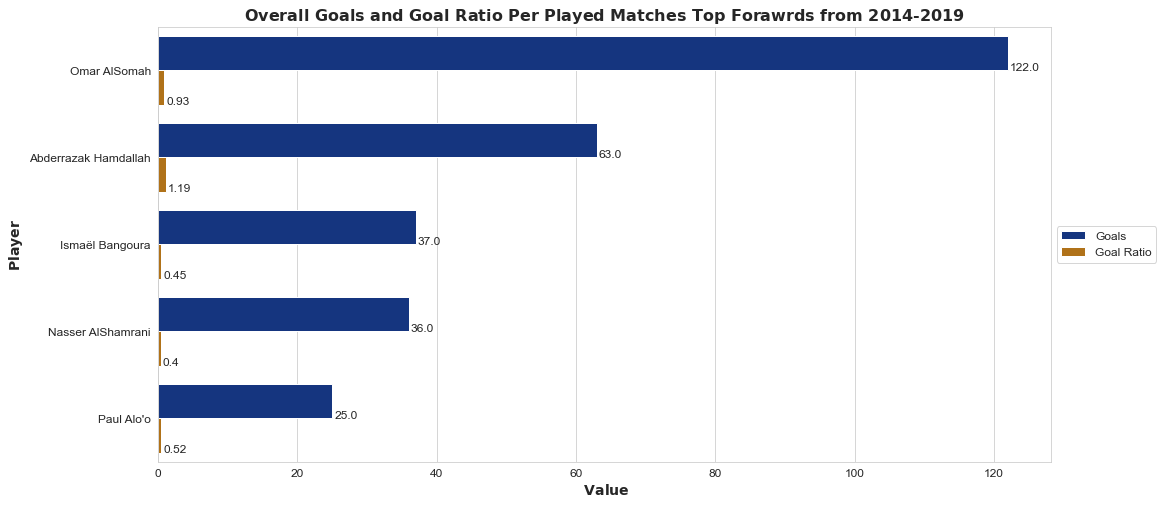

In [35]:
# Plot Forawrds only
tempf = top_teams_scorers_ratio[top_teams_scorers_ratio.Pos =='FW']
tempf = tempf.drop('Pos', axis=1)

tempf = pd.melt(tempf.drop(['MP'], axis=1), id_vars=['Player','Squad'] )
tempf = tempf.sort_values(by='value', ascending=False)               


tt = sns.barplot(data=tempf, y='Player', x='value', hue='variable');

show_values_on_bars(tt, 'h', 0.3);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('$Overall$ Goals and Goal Ratio Per Played Matches Top Forawrds from 2014-2019', fontsize=16);
plt.ylabel('$Player$', fontsize=14);
plt.xlabel(' $Value$', fontsize=14);

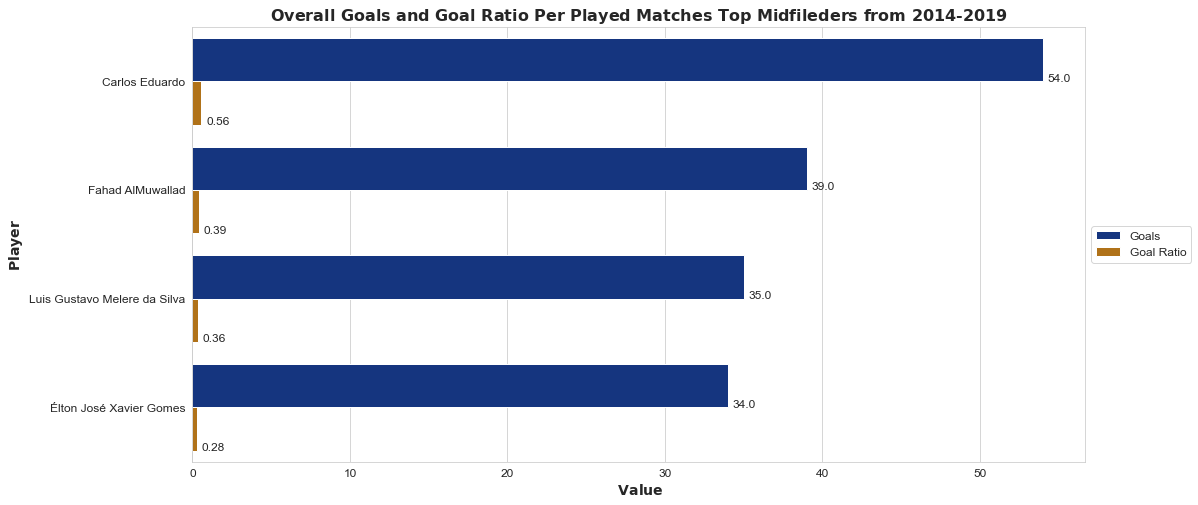

In [36]:
# Plot Midfileders only
tempf = top_teams_scorers_ratio[top_teams_scorers_ratio.Pos =='MF']
tempf = tempf.drop('Pos', axis=1)

tempf = pd.melt(tempf.drop(['MP'], axis=1), id_vars=['Player','Squad'] )
tempf = tempf.sort_values(by='value', ascending=False)               


tt = sns.barplot(data=tempf, y='Player', x='value', hue='variable');

show_values_on_bars(tt, 'h', 0.3);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('$Overall$ Goals and Goal Ratio Per Played Matches Top Midfileders from 2014-2019', fontsize=16);
plt.ylabel('$Player$', fontsize=14);
plt.xlabel(' $Value$', fontsize=14);

#### 7- Top scorers per team per year

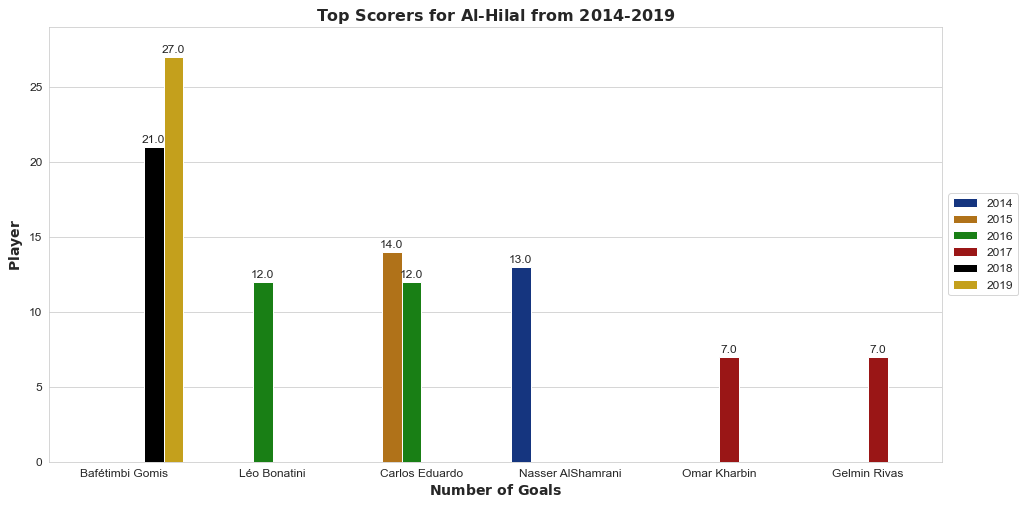

In [37]:
def get_top_scorer(t):
    name = []
    gols = []
    yy = []
    for y in top_teams.year:
        scor = top_teams[(top_teams.Squad == t) & (top_teams.year == y)]['Top Team Scorer'].values[0]
        g = top_teams[(top_teams.Squad == t) & (top_teams.year == y)]['Top Team Scorer Goals'].values[0]
        for s in scor:
            name.append(s)
            gols.append(g)
            yy.append(y)
    plt.figure();
    
    sns.set_palette(sns.color_palette(top_colors.values()));
    ax = sns.barplot( y= gols, x=name, hue=yy);
    show_values_on_bars(ax, 'v', 0.3)


    plt.title('$Top$ Scorers for {} from 2014-2019'.format(t), fontsize=16);
    plt.ylabel('$Player$', fontsize=14);
    plt.xlabel('Number of $Goals$', fontsize=14);
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, max(gols)+2)

get_top_scorer('Al-Hilal');

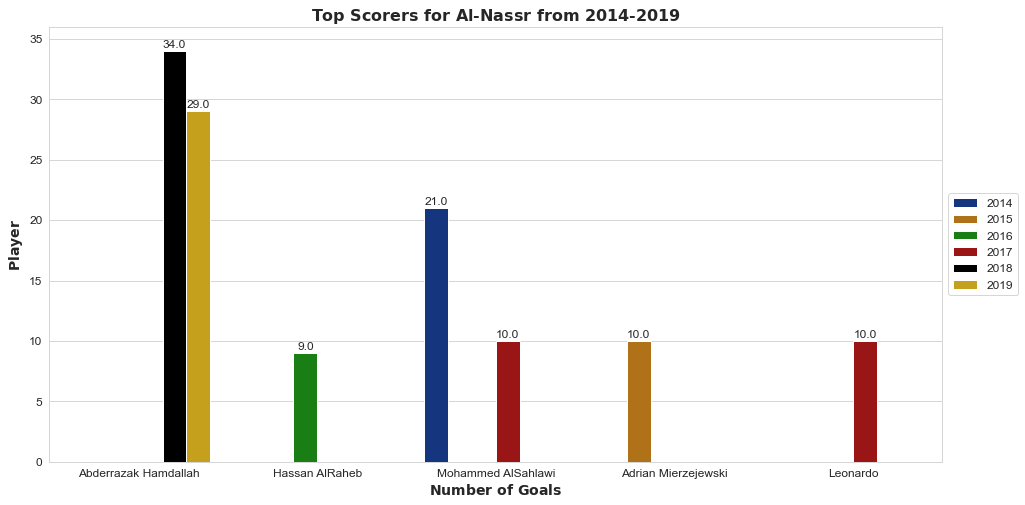

In [38]:
get_top_scorer(top_teams.Squad.unique()[1]);

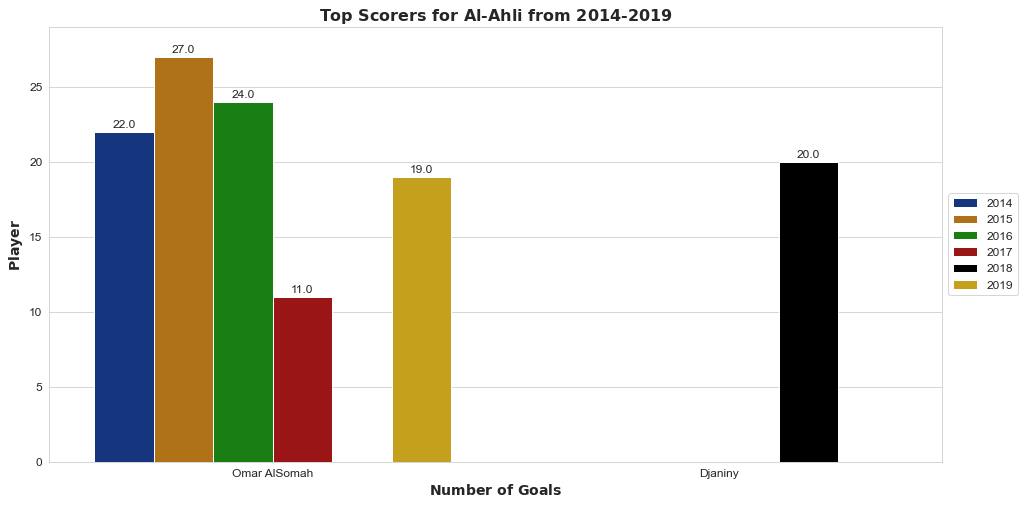

In [39]:
get_top_scorer(top_teams.Squad.unique()[2]);

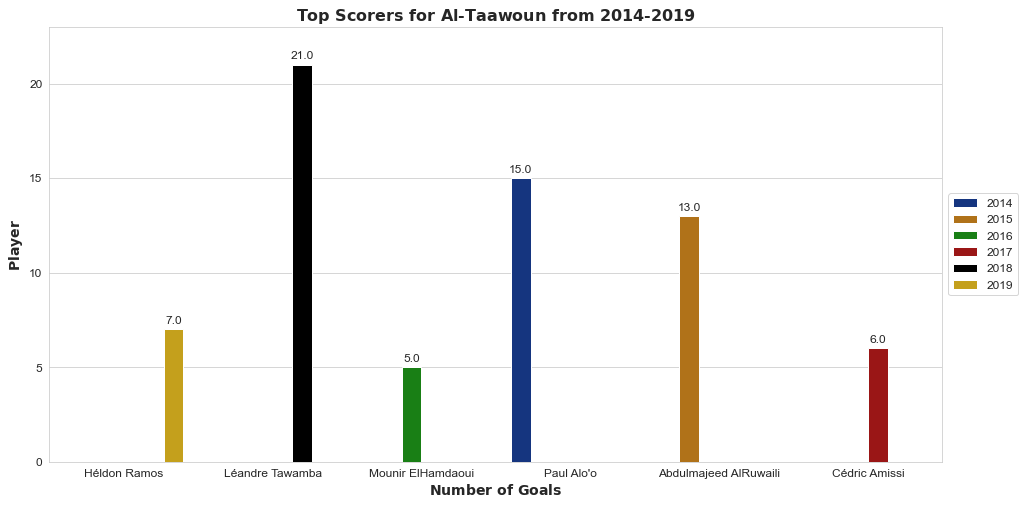

In [40]:
get_top_scorer(top_teams.Squad.unique()[3]);

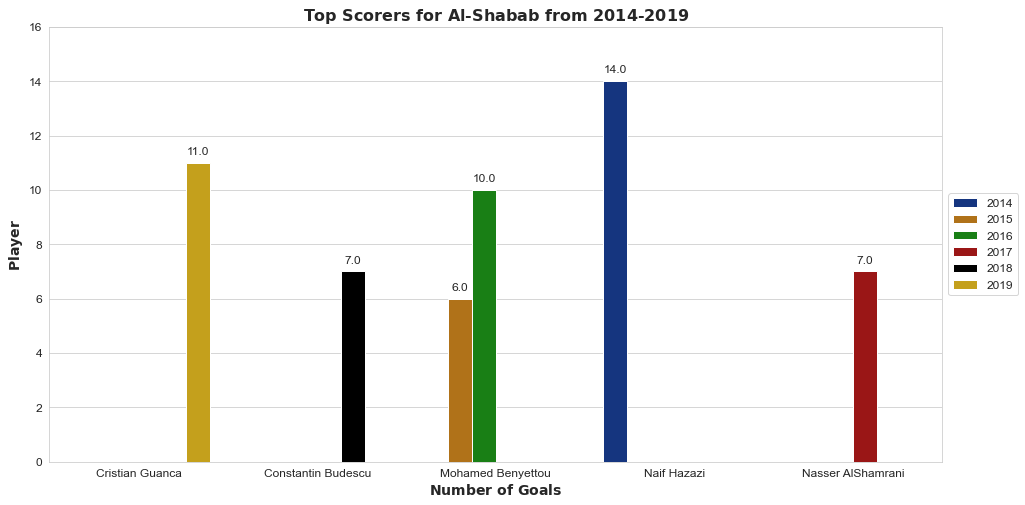

In [41]:
get_top_scorer(top_teams.Squad.unique()[4]);

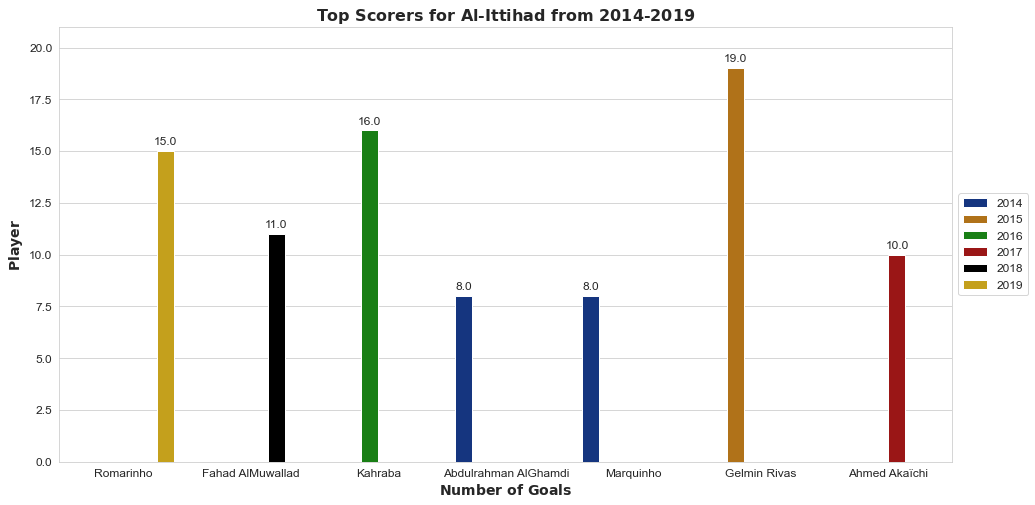

In [42]:
get_top_scorer(top_teams.Squad.unique()[5]);

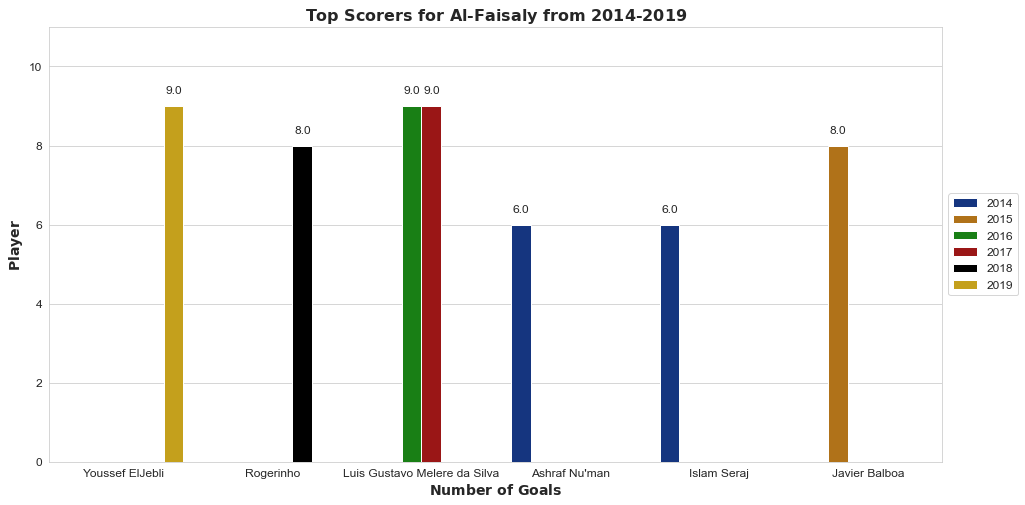

In [43]:
get_top_scorer(top_teams.Squad.unique()[6]);

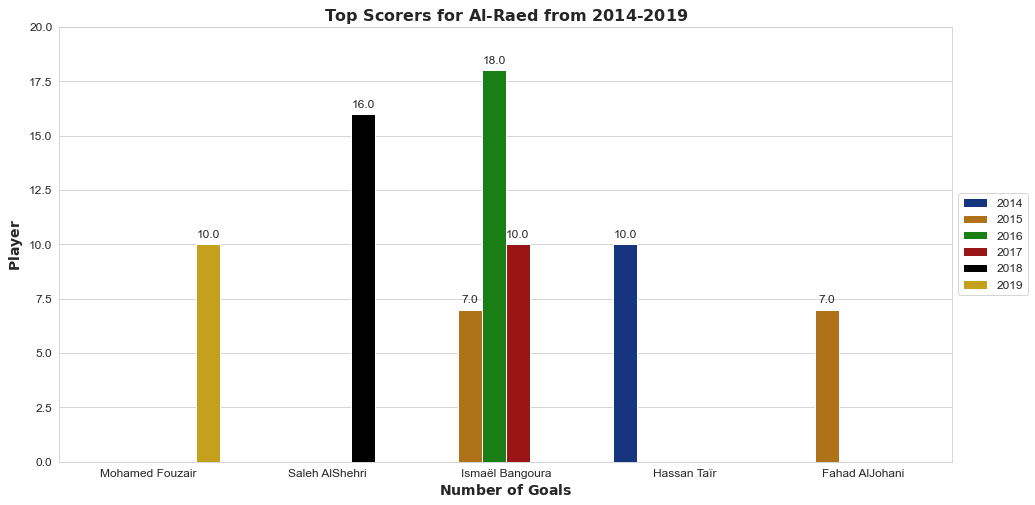

In [44]:
get_top_scorer(top_teams.Squad.unique()[7]);

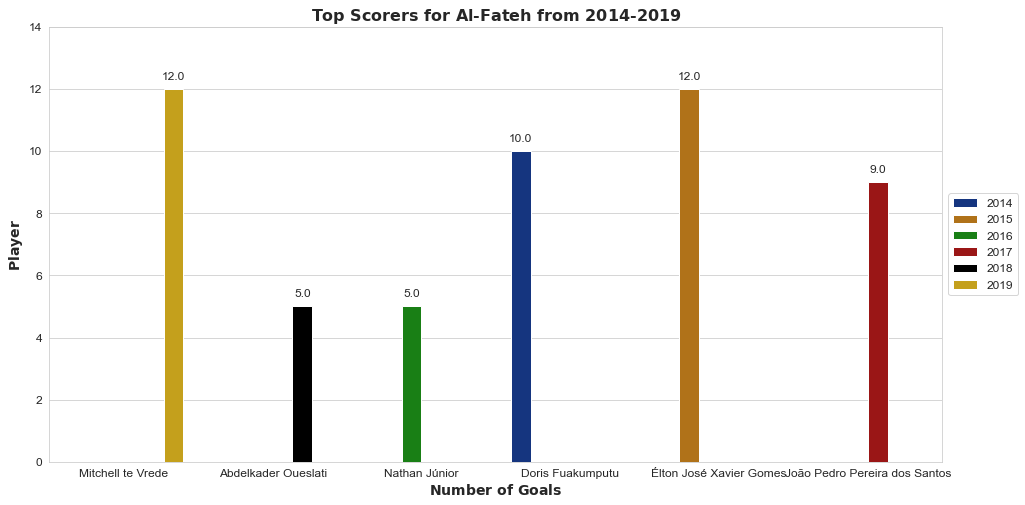

In [45]:
get_top_scorer(top_teams.Squad.unique()[8]);

#### 8- League winner stats per year

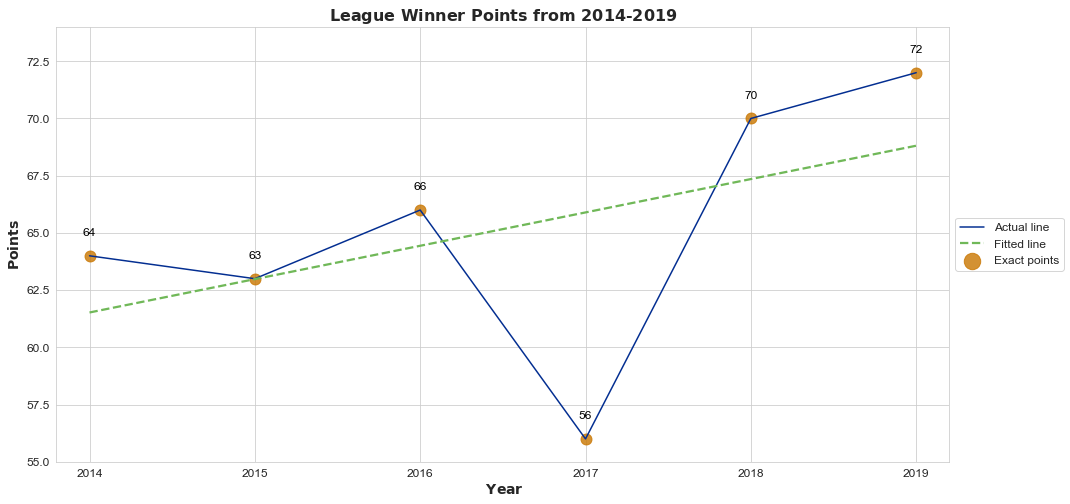

In [46]:
# Get the first team each year from 2014-2019
league_winner = league_tables.query("Rk == 1")
league_winner = league_winner.sort_values(by='year', ascending=True)
league_winner.reset_index(drop=True, inplace=True)

# Plot actual line
sns.lineplot(data=league_winner, x='year', y='Pts')
# Fit regression line
tv = sns.regplot(data=league_winner, x='year', y='Pts', scatter_kws={'s':120}, ci = None,
                 line_kws={'color':'#70b858','linestyle':'--'})

for i in range(0,league_winner.shape[0]):
    tv.text(league_winner.year[i], league_winner.Pts[i]+ 1, str((league_winner.Pts[i])),
             horizontalalignment='center',verticalalignment='center',
             size='medium', color='black')

plt.title('$League$ Winner Points from 2014-2019', fontsize=16);
plt.legend(labels=['Actual line', 'Fitted line','Exact points' ],
          loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel('$Points$', fontsize=14);
plt.xlabel(' $Year$', fontsize=14);
plt.ylim(league_winner.Pts.min()-1, league_winner.Pts.max()+2);
plt.xlim(2013.8, 2019.2);

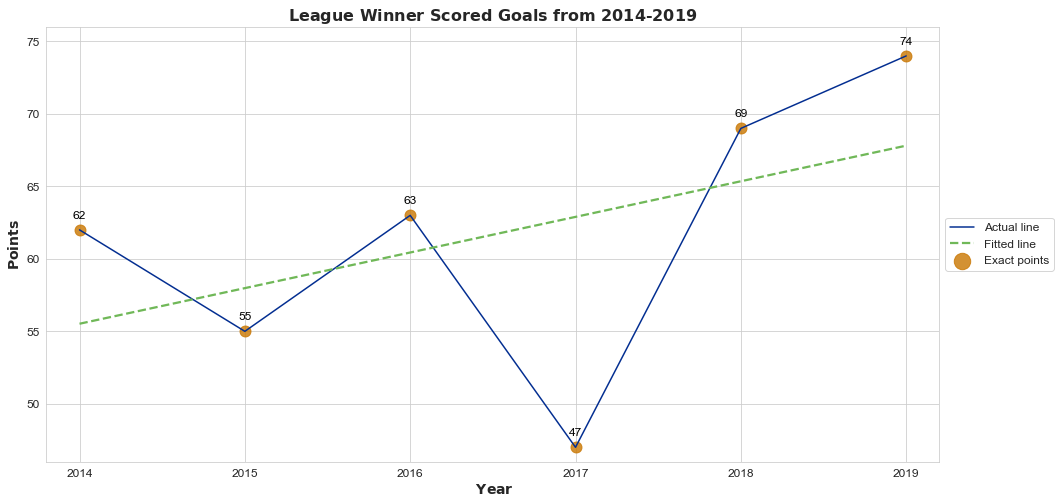

In [47]:
# Plot actual line
sns.lineplot(data=league_winner, x='year', y='GF')
# Fit regression line
tv = sns.regplot(data=league_winner, x='year', y='GF', scatter_kws={'s':120}, ci = None,
                 line_kws={'color':'#70b858','linestyle':'--'})

for i in range(0,league_winner.shape[0]):
    tv.text(league_winner.year[i], league_winner.GF[i]+ 1, str((league_winner.GF[i])),
             horizontalalignment='center',verticalalignment='center',
             size='medium', color='black')

plt.title('$League$ Winner Scored Goals from 2014-2019', fontsize=16);
plt.legend(labels=['Actual line', 'Fitted line','Exact points' ],
          loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel('$Points$', fontsize=14);
plt.xlabel(' $Year$', fontsize=14);
plt.ylim(league_winner.GF.min()-1, league_winner.GF.max()+2);
plt.xlim(2013.8, 2019.2);

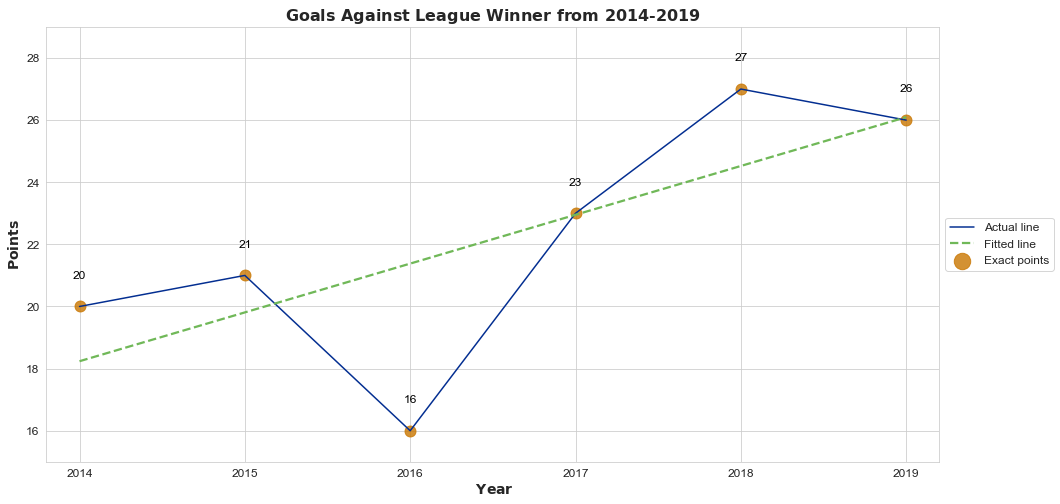

In [48]:
# Plot actual line
sns.lineplot(data=league_winner, x='year', y='GA')
# Fit regression line
tv = sns.regplot(data=league_winner, x='year', y='GA', scatter_kws={'s':120}, ci = None,
                 line_kws={'color':'#70b858','linestyle':'--'})

for i in range(0,league_winner.shape[0]):
    tv.text(league_winner.year[i], league_winner.GA[i]+ 1, str((league_winner.GA[i])),
             horizontalalignment='center',verticalalignment='center',
             size='medium', color='black')

plt.title('Goals Against $League$ Winner from 2014-2019', fontsize=16);
plt.legend(labels=['Actual line', 'Fitted line','Exact points' ],
          loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel('$Points$', fontsize=14);
plt.xlabel(' $Year$', fontsize=14);
plt.ylim(league_winner.GA.min()-1, league_winner.GA.max()+2);
plt.xlim(2013.8, 2019.2);

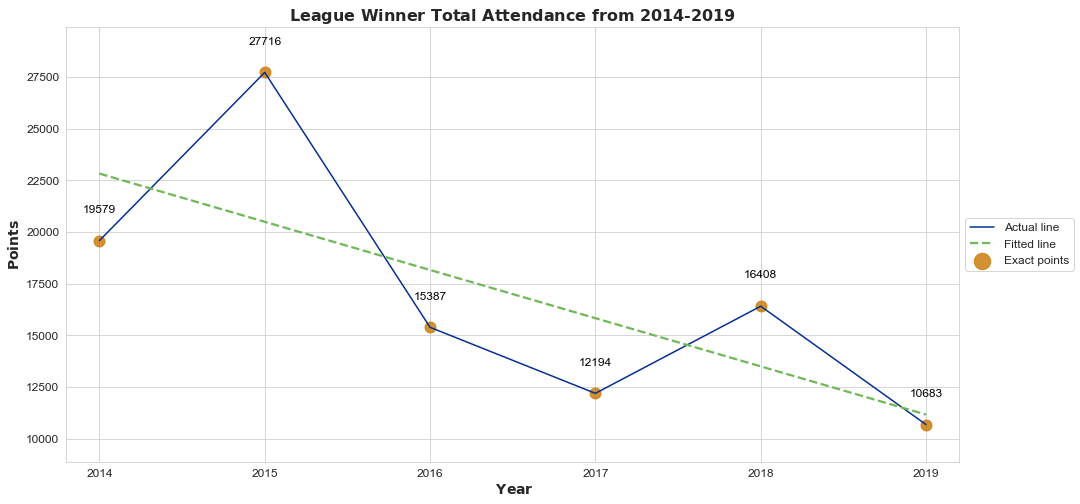

In [49]:
# Plot actual line
sns.lineplot(data=league_winner, x='year', y='Attendance')
# Fit regression line
tv = sns.regplot(data=league_winner, x='year', y='Attendance', scatter_kws={'s':120}, ci = None,
                 line_kws={'color':'#70b858','linestyle':'--'})

for i in range(0,league_winner.shape[0]):
    tv.text(league_winner.year[i], league_winner.Attendance[i]+ 1500, str((league_winner.Attendance[i])),
             horizontalalignment='center',verticalalignment='center',
             size='medium', color='black')

plt.title('$League$ Winner Total Attendance from 2014-2019', fontsize=16);
plt.legend(labels=['Actual line', 'Fitted line','Exact points' ],
          loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel('$Points$', fontsize=14);
plt.xlabel(' $Year$', fontsize=14);
plt.ylim(league_winner.Attendance.min()-1800, league_winner.Attendance.max()+2200);
plt.xlim(2013.8, 2019.2);

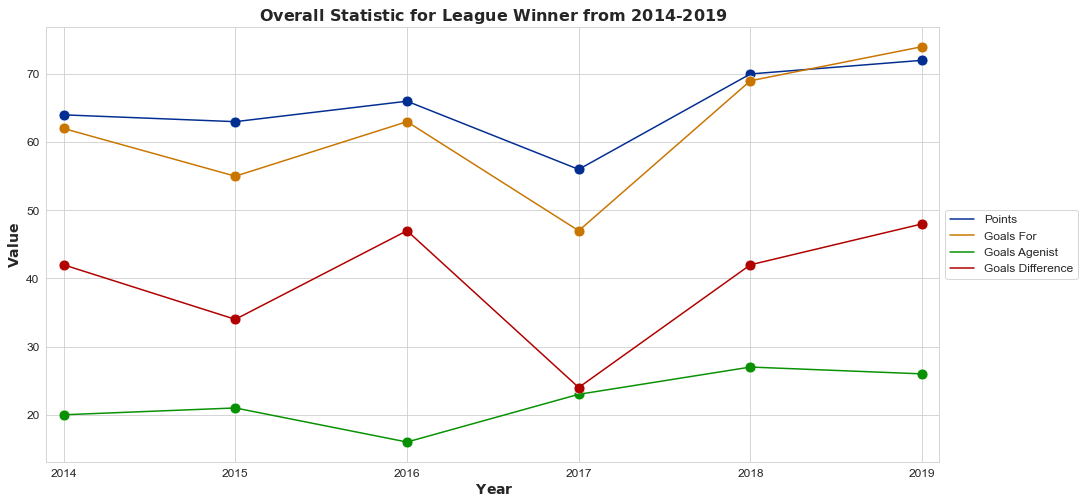

In [50]:
# Plot actual line
sns.lineplot(data=league_winner, x='year', y='Pts', label='Points')
sns.lineplot(data=league_winner, x='year', y='GF', label='Goals For')
sns.lineplot(data=league_winner, x='year', y='GA', label='Goals Agenist')
sns.lineplot(data=league_winner, x='year', y='GDiff', label='Goals Difference')

# Plot scatter plot
sns.scatterplot(data=league_winner, x='year', y='Pts', s=120 )
sns.scatterplot(data=league_winner, x='year', y='GF', s=120)
sns.scatterplot(data=league_winner, x='year', y='GA', s=120)
sns.scatterplot(data=league_winner, x='year', y='GDiff', s=120)


plt.title('Overall Statistic for $League$ Winner from 2014-2019', fontsize=16);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel('$Value$', fontsize=14);
plt.xlabel(' $Year$', fontsize=14);
plt.xlim(2013.9, 2019.1);

#### 9- Number of Saudi player per team

In [51]:
def get_nationality(list_teams):
    df = pd.DataFrame(columns=['Squad', 'Player', 'No Seasons', 'Nation', 'Pos'])
        
    for t in list_teams:
        team_df = players[players.Squad == t]
        for player in team_df.Player.unique():
            p = players[(players.Player == player) & (players.Squad == t)]
            ns = p.shape[0]           
            df = df.append({'Squad':t, 'Player':player, 'No Seasons':ns,
                            'Nation':p.Nation.iloc[0], 'Pos':p.Pos.max()},ignore_index=True)
    
    return df       

uni_players = get_nationality(top_teams.Squad.unique())

In [52]:
tem1 = uni_players.groupby(['Squad','Nation'],as_index=False).count()
tem1 = tem1[tem1.Nation == 'KSA'][['Squad','Nation','Player']].sort_values(by='Squad').reset_index(drop=True)
tem2 = uni_players.groupby('Squad',as_index=False)['Player'].count().sort_values(by='Squad',ascending=False)

tem1 = tem1.rename(columns={'Player':'No KSA Players'})
tem2 = tem2.rename(columns={'Player':'No Players'})
tem3 = pd.concat([tem1.drop('Nation', axis=1),tem2.drop('Squad', axis=1)], axis=1).sort_values(by='No KSA Players', ascending=False)

tem3['Ratio of KSA Players'] = tem3['No KSA Players']/tem3['No Players']


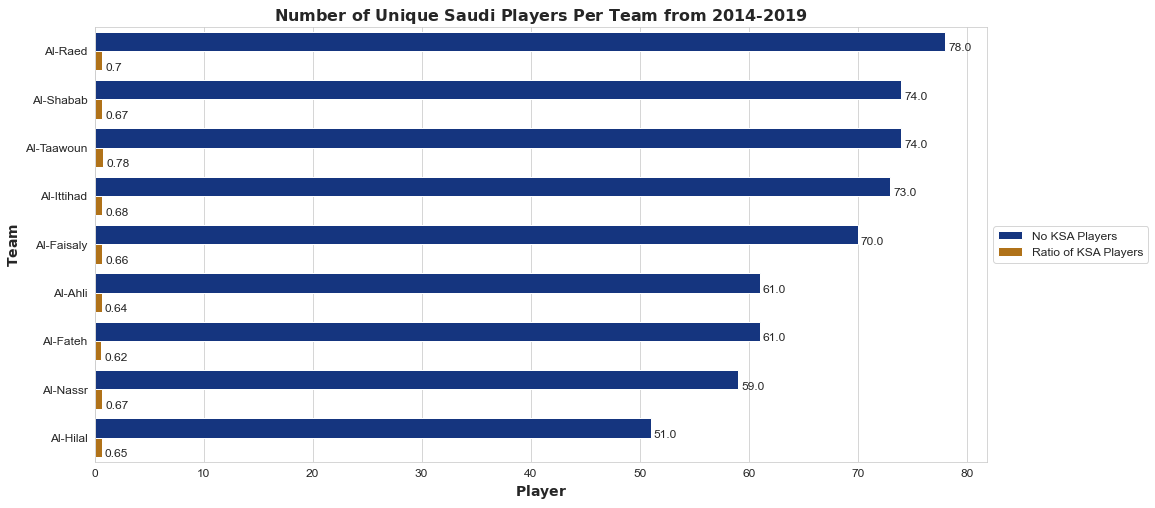

In [53]:
tem4 = pd.melt(tem3.drop('No Players',axis=1), id_vars='Squad')

sns.set_palette(sns.color_palette(top_colors.values()));
ax = sns.barplot( data= tem4 , y= 'Squad', x='value', hue='variable' );

show_values_on_bars(ax, 'h', 0.3)


plt.title('$Number$ of Unique Saudi Players Per Team from 2014-2019', fontsize=16);
plt.xlabel('$Player$', fontsize=14);
plt.ylabel('$Team$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

In [54]:
tem3

Squad  No KSA Players  No Players  Ratio of KSA Players
6     Al-Raed              78         112              0.696429
7   Al-Shabab              74         110              0.672727
8  Al-Taawoun              74          95              0.778947
4  Al-Ittihad              73         107              0.682243
1  Al-Faisaly              70         106              0.660377
0     Al-Ahli              61          95              0.642105
2    Al-Fateh              61          98              0.622449
5    Al-Nassr              59          88              0.670455
3    Al-Hilal              51          78              0.653846

#### 10- Top 5 players nationality for the period 2014-2019
Other than KSA

KSA : Saudi Arabia
BRA : Brasil
MAR : Morocco
EGY : Egypt
TUN : Tunisia
ALG : Algeria

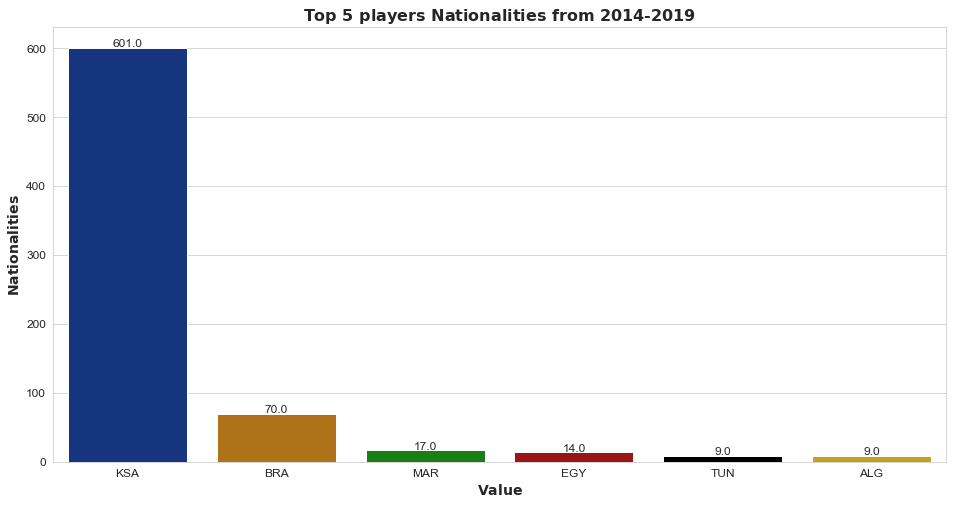

In [55]:
top_na = uni_players.groupby('Nation',as_index=False).count()[['Nation','Squad']].sort_values(
    by='Squad',ascending=False).reset_index(drop=True)

na5 = top_na.loc[:5]

sns.set_palette(sns.color_palette(top_colors.values()));
ax = sns.barplot( data= na5 , x= 'Nation', y='Squad');
show_values_on_bars(ax, 'v', 1)

plt.title('$Top$ 5 players Nationalities from 2014-2019', fontsize=16);
plt.ylabel('$Nationalities$', fontsize=14);
plt.xlabel('$Value$', fontsize=14);


#### 11- Top 5 players nationality per team per year

In [56]:
pn5s = players[players.Squad.isin(top_teams.Squad.unique())].groupby(['Squad', 'year', 
                                                                      'Nation','Pos'], as_index=False)['Player'].count()

def get_nationality_per_team(t):
    df1 = pd.DataFrame(columns=['year','Nation' ,'Pos' , 'Player'])
    rt = []
    for y in pn5s.year.unique():
        df = pn5s[(pn5s.Squad == t) & (pn5s.year == y)].drop('year', axis=1).groupby(['Nation','Pos'],as_index=False).sum()
        df['year'] = y
        ratio = df[df.Nation == 'KSA']['Player'].sum()/df.Player.sum()
        rt.append(round(ratio,2))
        df1 = df1.append(df, ignore_index=True)
        
    df3 = df1.groupby(['year','Nation'], as_index=False)['Player'].sum()

    ah = sns.FacetGrid(df3, col='year', hue='Nation',col_wrap=2, size=4, aspect=1.5, palette="Spectral");
    ah.map(plt.bar,'Nation','Player');
    ah.add_legend()

    for ax in ah.axes.ravel():
        for p in ax.patches:
            ax.annotate(round(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ah.fig.subplots_adjust(top=0.9)        
    ah.fig.suptitle('{} $Players$ Nationalities from 2014-2019'.format(t), fontsize=16)
    
    return df1, rt

The ratio of Saudi Players to others at Al-Hilal from 2014-2019 [0.83, 0.83, 0.81, 0.73, 0.63, 0.74]


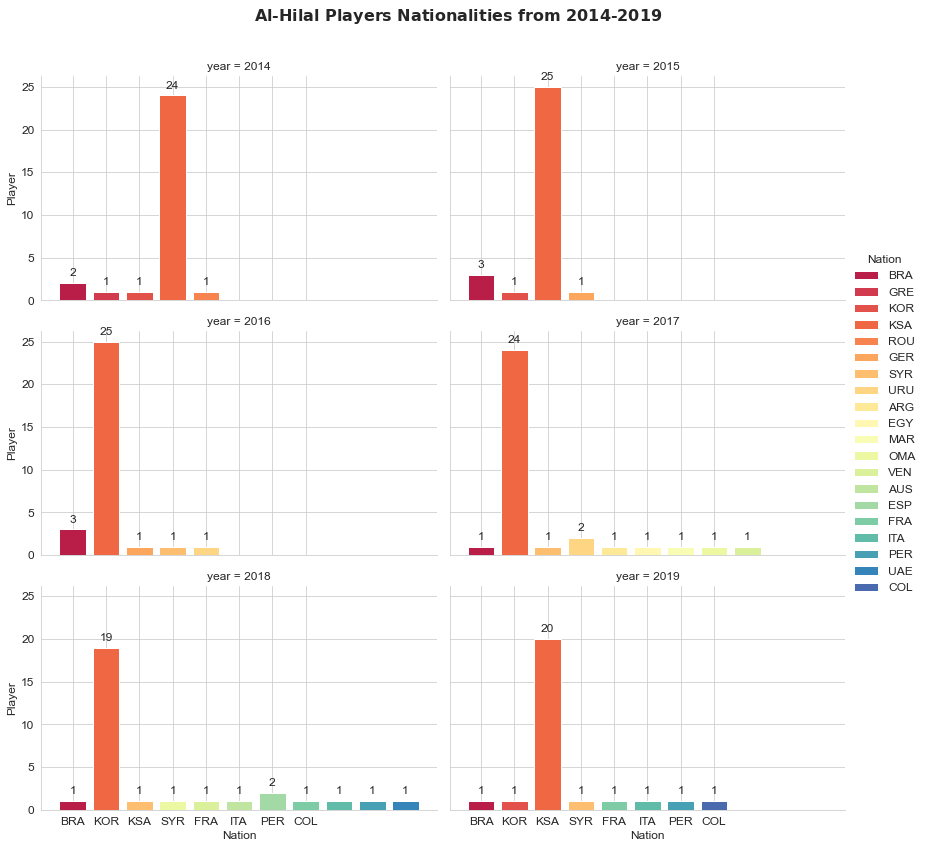

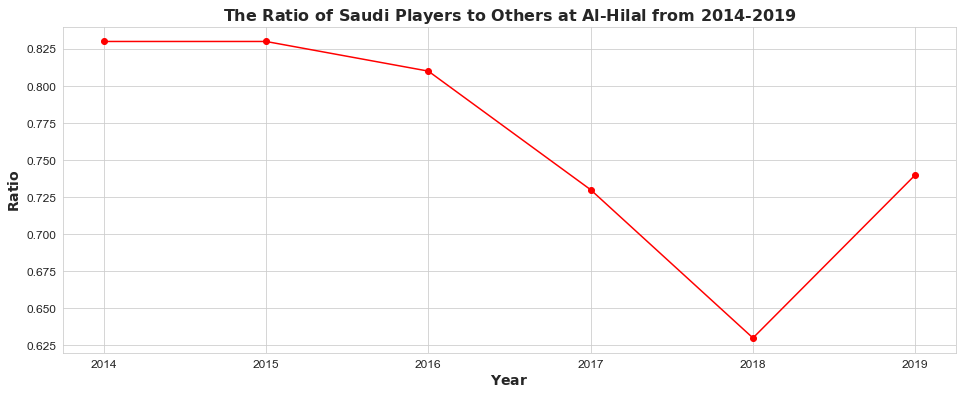

In [57]:
t = top_teams.Squad.unique()[0]
df, ratio = get_nationality_per_team(t)
plt.figure(figsize=(16,6));
plt.title('$The$ Ratio of Saudi Players to Others at {} from 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Ratio$', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.plot(df.year.unique(),ratio, 'r-o');
print('The ratio of Saudi Players to others at {} from 2014-2019'.format(t),ratio)


The ratio of Saudi Players to others at Al-Nassr from 2014-2019 [0.79, 0.82, 0.85, 0.71, 0.71, 0.74]


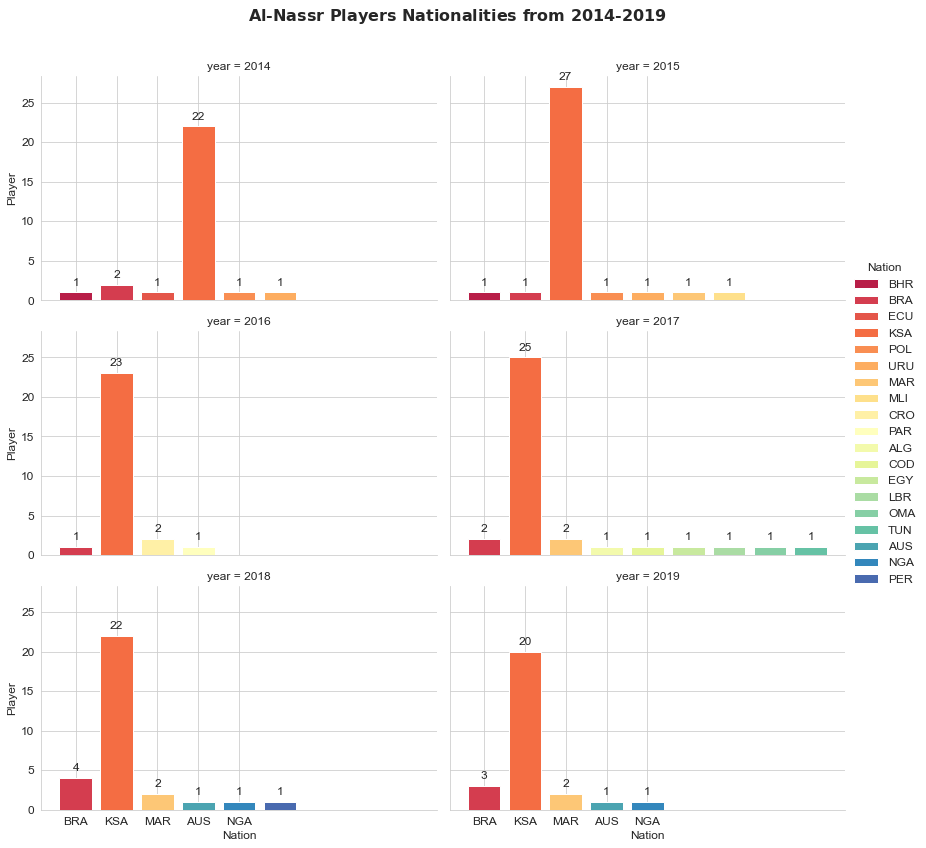

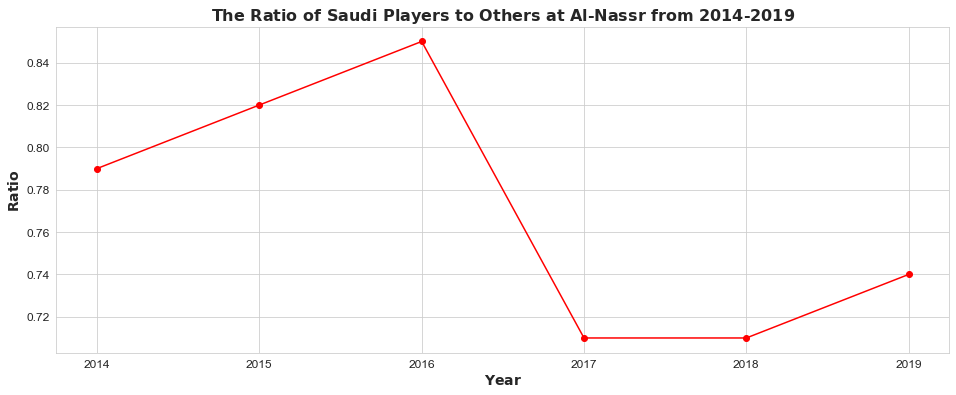

In [58]:
t = top_teams.Squad.unique()[1]
df, ratio = get_nationality_per_team(t)
plt.figure(figsize=(16,6));
plt.title('$The$ Ratio of Saudi Players to Others at {} from 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Ratio$', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.plot(df.year.unique(),ratio, 'r-o');
print('The ratio of Saudi Players to others at {} from 2014-2019'.format(t),ratio)

The ratio of Saudi Players to others at Al-Ahli from 2014-2019 [0.73, 0.81, 0.82, 0.72, 0.69, 0.75]


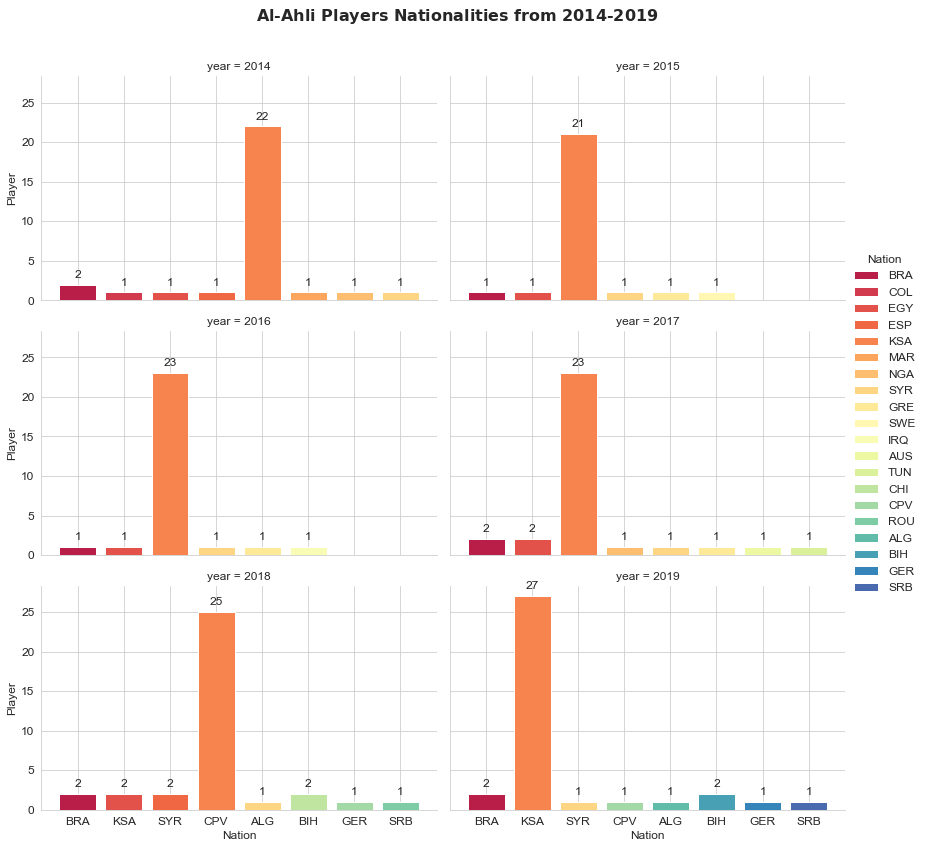

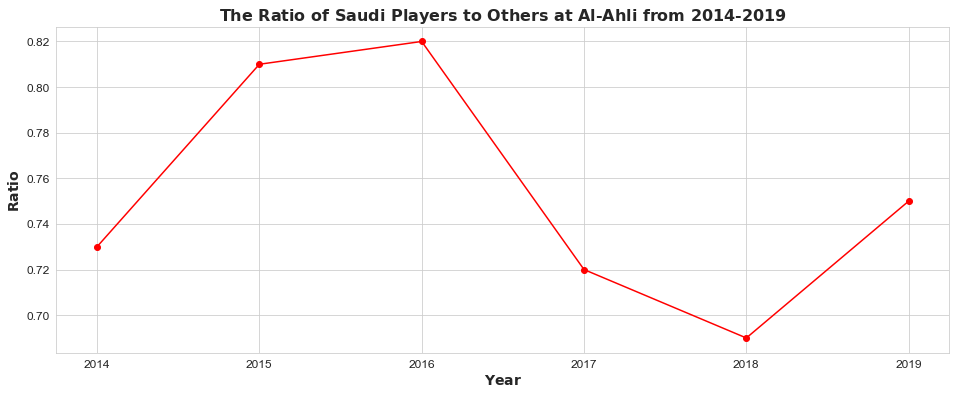

In [59]:
t = top_teams.Squad.unique()[2]
df, ratio = get_nationality_per_team(t)
plt.figure(figsize=(16,6));
plt.title('$The$ Ratio of Saudi Players to Others at {} from 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Ratio$', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.plot(df.year.unique(),ratio, 'r-o');
print('The ratio of Saudi Players to others at {} from 2014-2019'.format(t),ratio)

The ratio of Saudi Players to others at Al-Taawoun from 2014-2019 [0.85, 0.85, 0.79, 0.68, 0.65, 0.77]


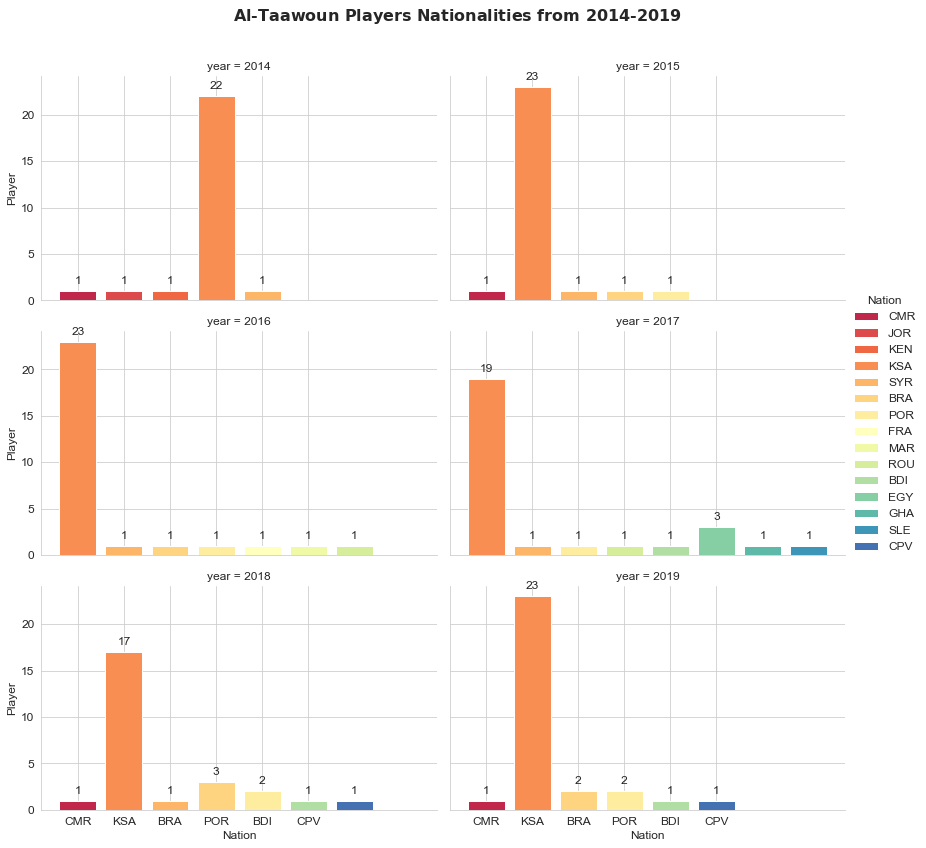

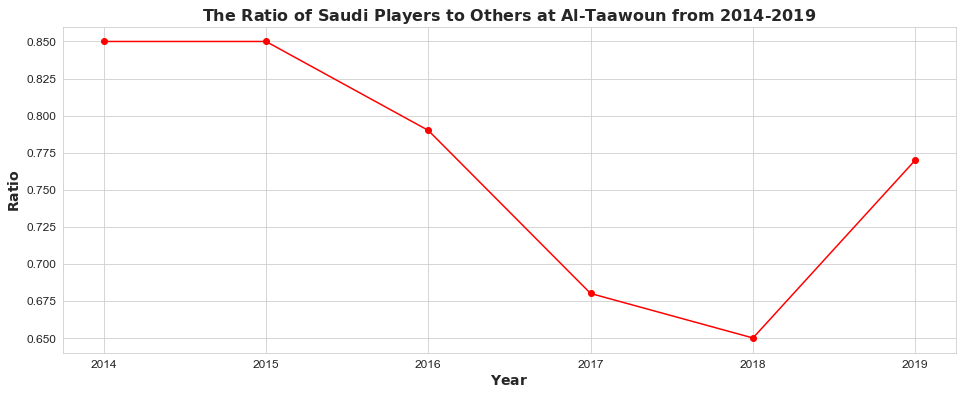

In [60]:
t = top_teams.Squad.unique()[3]
df, ratio = get_nationality_per_team(t)
plt.figure(figsize=(16,6));
plt.title('$The$ Ratio of Saudi Players to Others at {} from 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Ratio$', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.plot(df.year.unique(),ratio, 'r-o');
print('The ratio of Saudi Players to others at {} from 2014-2019'.format(t),ratio)

The ratio of Saudi Players to others at Al-Shabab from 2014-2019 [0.79, 0.79, 0.85, 0.74, 0.65, 0.7]


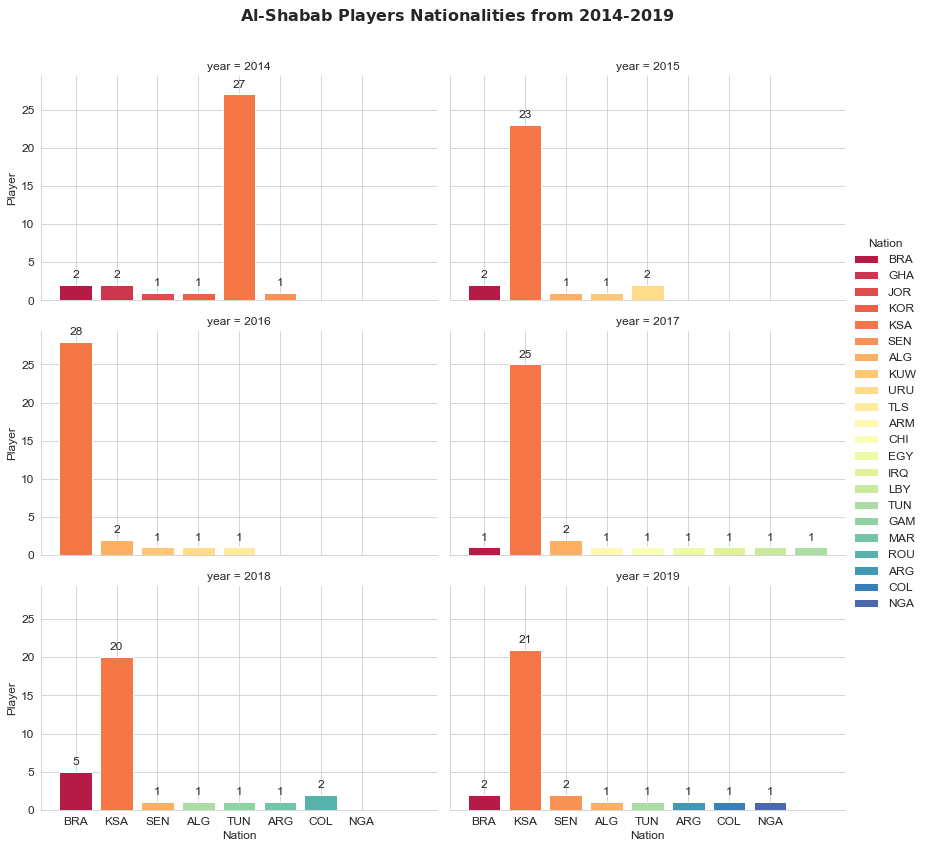

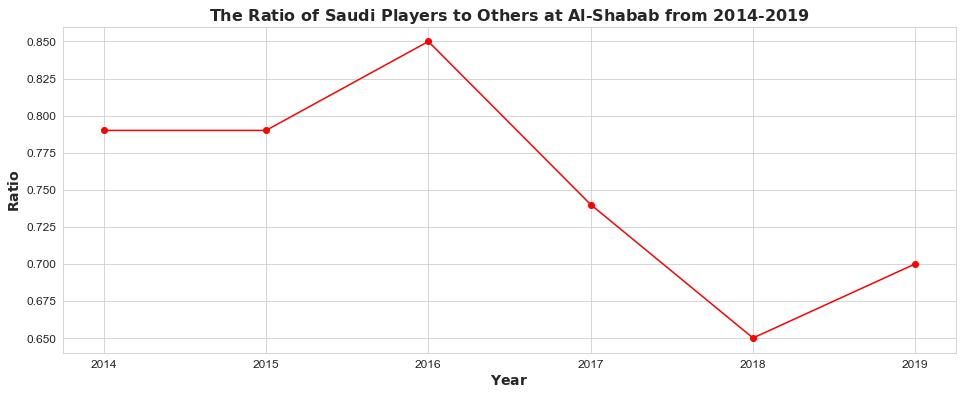

In [61]:
t = top_teams.Squad.unique()[4]
df, ratio = get_nationality_per_team(t)
plt.figure(figsize=(16,6));
plt.title('$The$ Ratio of Saudi Players to Others at {} from 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Ratio$', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.plot(df.year.unique(),ratio, 'r-o');
print('The ratio of Saudi Players to others at {} from 2014-2019'.format(t),ratio)

The ratio of Saudi Players to others at Al-Ittihad from 2014-2019 [0.75, 0.83, 0.88, 0.86, 0.7, 0.64]


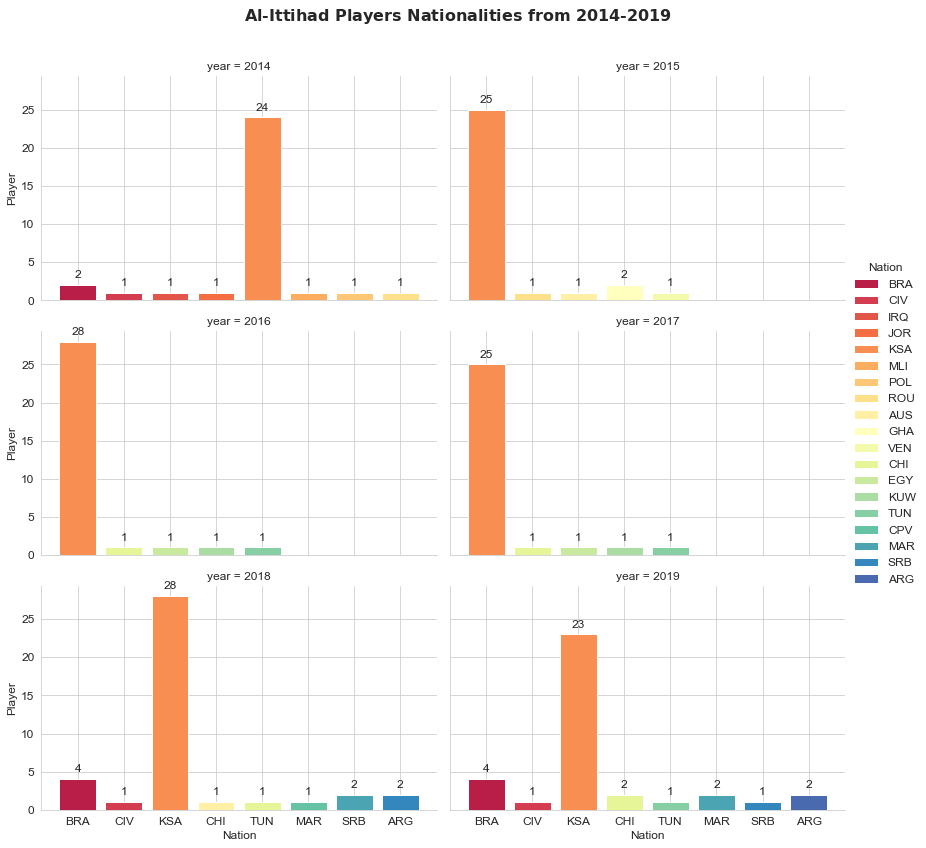

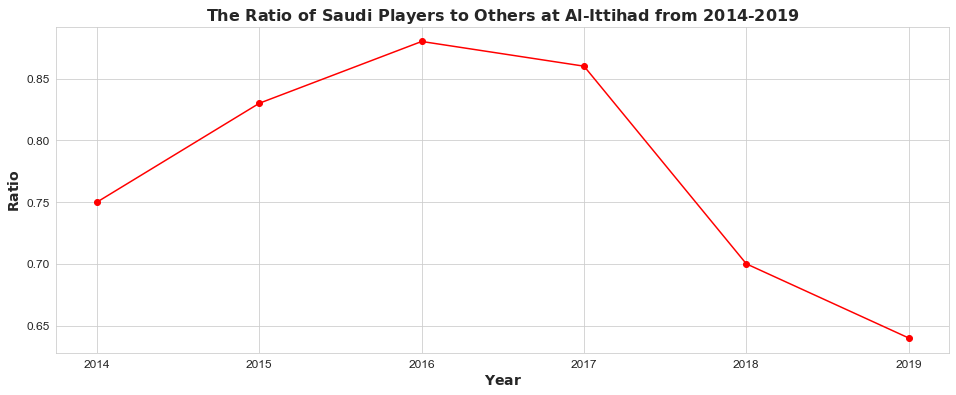

In [62]:
t = top_teams.Squad.unique()[5]
df, ratio = get_nationality_per_team(t)
plt.figure(figsize=(16,6));
plt.title('$The$ Ratio of Saudi Players to Others at {} from 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Ratio$', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.plot(df.year.unique(),ratio, 'r-o');
print('The ratio of Saudi Players to others at {} from 2014-2019'.format(t),ratio)

The ratio of Saudi Players to others at Al-Faisaly from 2014-2019 [0.78, 0.74, 0.76, 0.65, 0.62, 0.67]


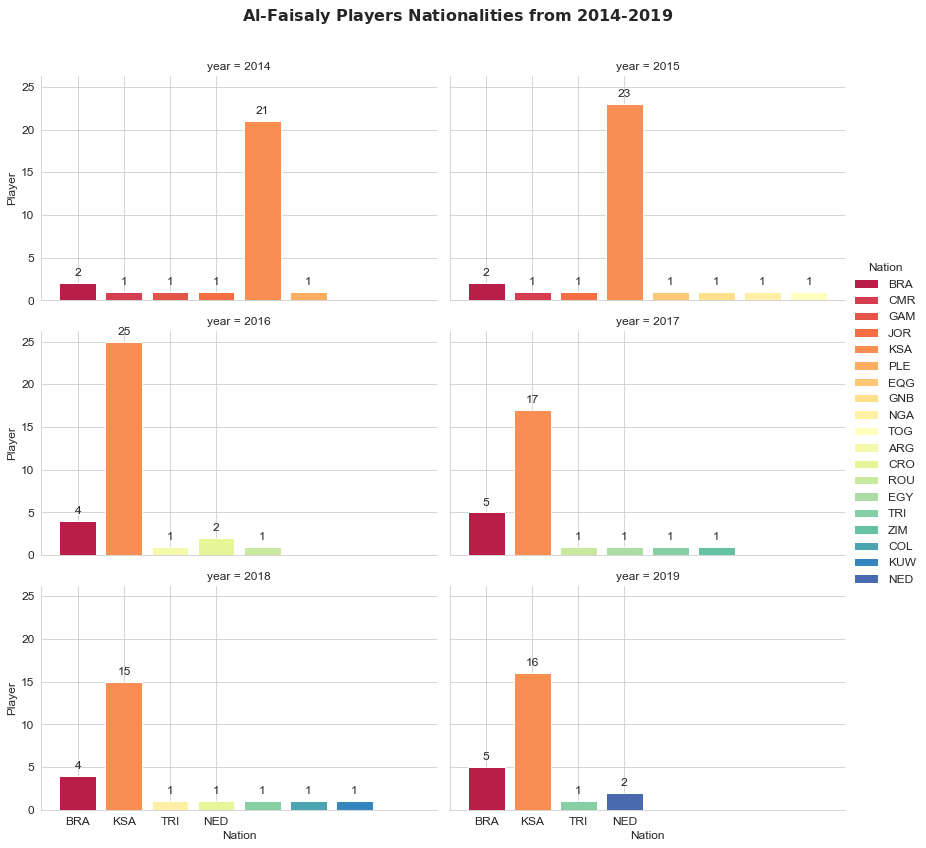

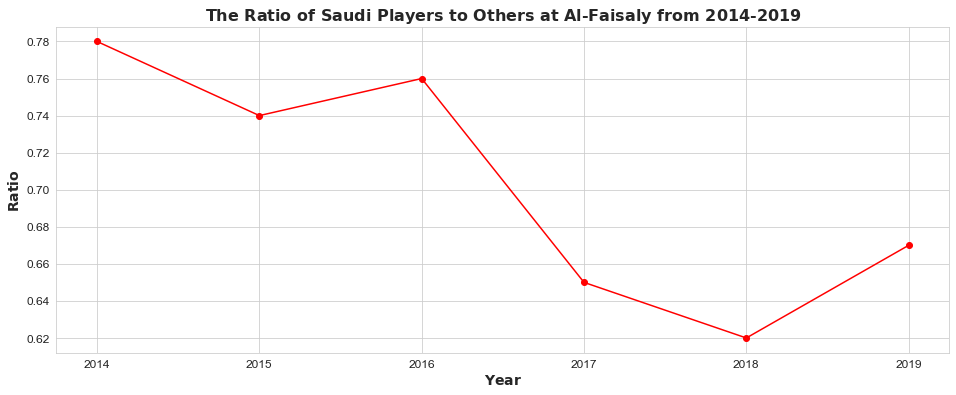

In [63]:

t = top_teams.Squad.unique()[6]
df, ratio = get_nationality_per_team(t)
plt.figure(figsize=(16,6));
plt.title('$The$ Ratio of Saudi Players to Others at {} from 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Ratio$', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.plot(df.year.unique(),ratio, 'r-o');
print('The ratio of Saudi Players to others at {} from 2014-2019'.format(t),ratio)

The ratio of Saudi Players to others at Al-Raed from 2014-2019 [0.82, 0.77, 0.84, 0.72, 0.64, 0.7]


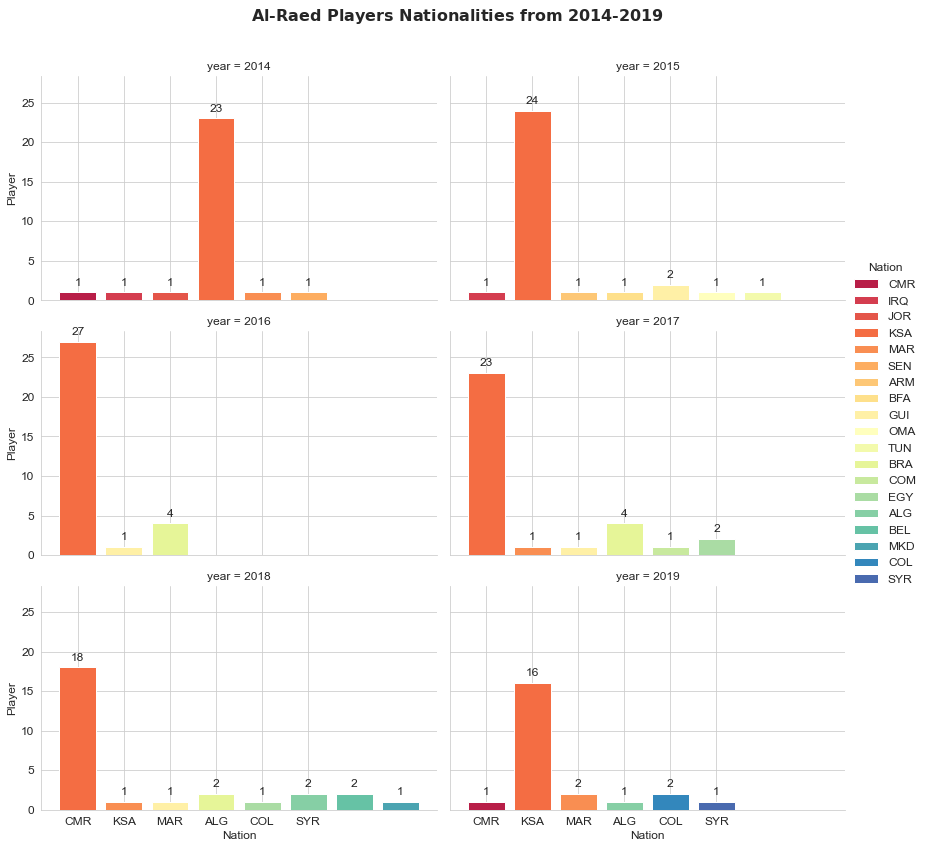

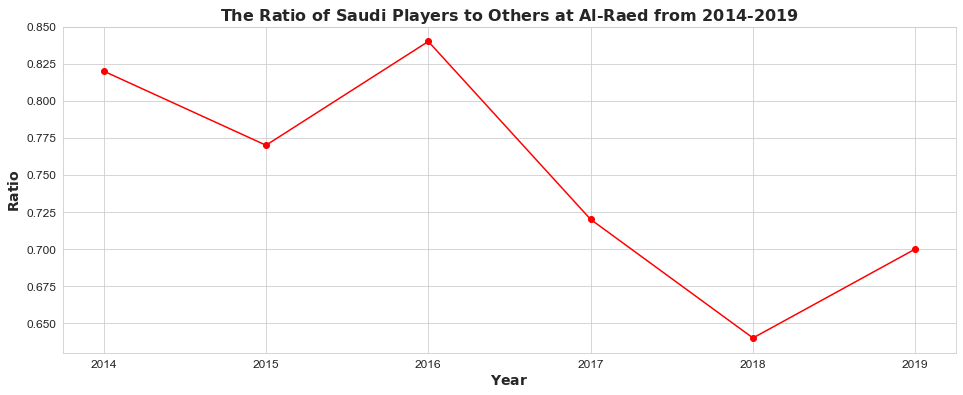

In [64]:
t = top_teams.Squad.unique()[7]
df, ratio = get_nationality_per_team(t)
plt.figure(figsize=(16,6));
plt.title('$The$ Ratio of Saudi Players to Others at {} from 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Ratio$', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.plot(df.year.unique(),ratio, 'r-o');
print('The ratio of Saudi Players to others at {} from 2014-2019'.format(t),ratio)

The ratio of Saudi Players to others at Al-Fateh from 2014-2019 [0.77, 0.76, 0.76, 0.73, 0.66, 0.58]


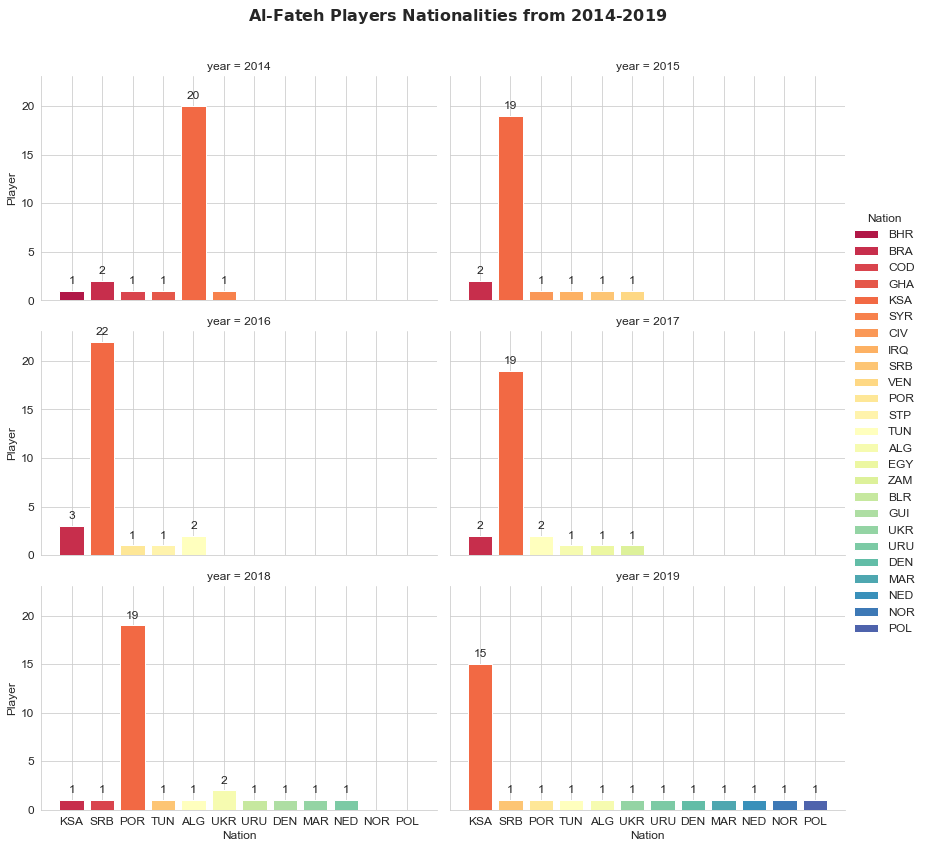

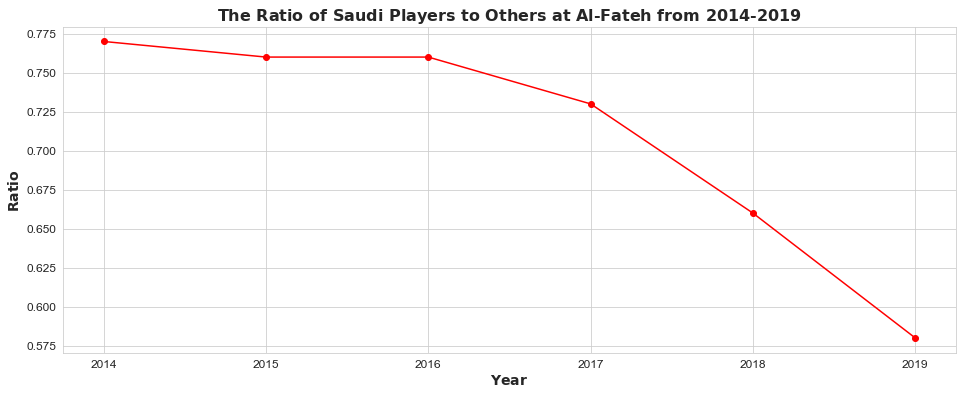

In [65]:
t = top_teams.Squad.unique()[8]
df, ratio = get_nationality_per_team(t)
plt.figure(figsize=(16,6));
plt.title('$The$ Ratio of Saudi Players to Others at {} from 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Ratio$', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.plot(df.year.unique(),ratio, 'r-o');
print('The ratio of Saudi Players to others at {} from 2014-2019'.format(t),ratio)

#### 12- Average age per team

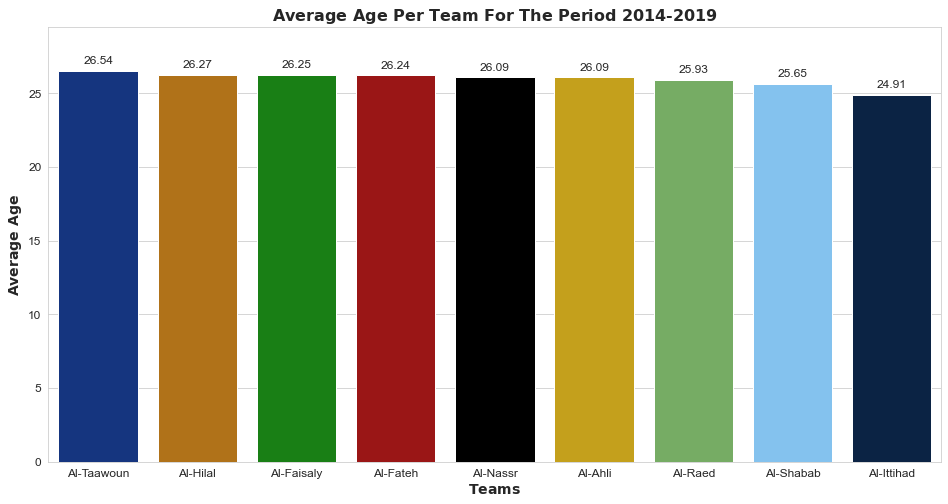

In [66]:
age_df = (players[players.Squad.isin(top_teams.Squad.unique())]
 .groupby('Squad', as_index=False)['Age']
 .mean()
 .sort_values(by='Age', ascending=False)
 .round(2)
 .reset_index(drop=True))

sns.set_palette(top_colors.values())
aa = sns.barplot(data=age_df, x='Squad', y='Age');
show_values_on_bars(aa, 'v', 0.45)
plt.ylim(0, 29.5);

plt.title('$Average$ Age Per Team For The Period 2014-2019', fontsize=16);
plt.ylabel('$Average$ Age', fontsize=14);
plt.xlabel('$Teams$', fontsize=14);

#### 13- Average Saudi age per team

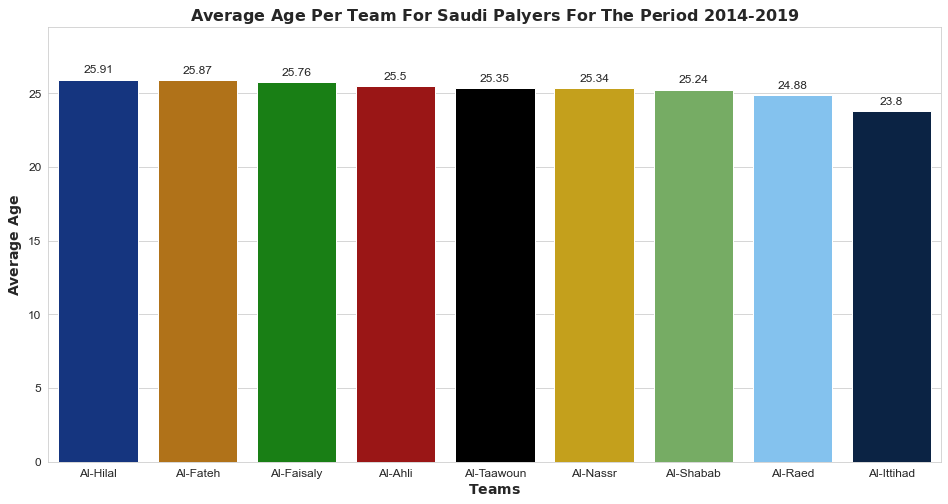

In [67]:
age_df_ksa = (players[(players.Squad.isin(top_teams.Squad.unique())) & (players.Nation == 'KSA')]
 .groupby('Squad', as_index=False)['Age']
 .mean()
 .sort_values(by='Age', ascending=False)
 .round(2)
 .reset_index(drop=True))

sns.set_palette(top_colors.values())
aa = sns.barplot(data=age_df_ksa, x='Squad', y='Age');
show_values_on_bars(aa, 'v', 0.45)
plt.ylim(0, 29.5);

plt.title('$Average$ Age Per Team For Saudi Palyers For The Period 2014-2019', fontsize=16);
plt.ylabel('$Average$ Age', fontsize=14);
plt.xlabel('$Teams$', fontsize=14);

#### 14- Average non-Saudi age per team

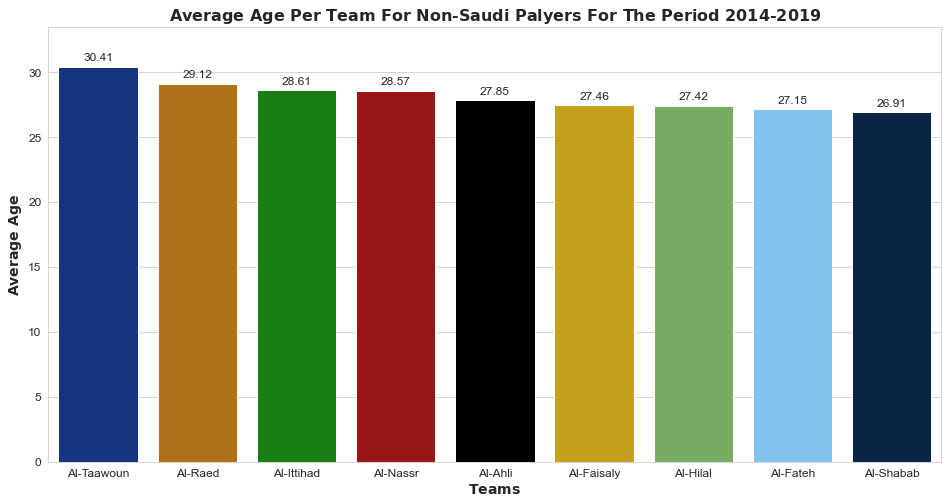

In [68]:
age_df_non_ksa = (players[(players.Squad.isin(top_teams.Squad.unique())) & (players.Nation != 'KSA')]
 .groupby('Squad', as_index=False)['Age']
 .mean()
 .sort_values(by='Age', ascending=False)
 .round(2)
 .reset_index(drop=True))

sns.set_palette(top_colors.values())
aa = sns.barplot(data=age_df_non_ksa, x='Squad', y='Age');
show_values_on_bars(aa, 'v', 0.45)
plt.ylim(0, 33.5);

plt.title('$Average$ Age Per Team For Non-Saudi Palyers For The Period 2014-2019', fontsize=16);
plt.ylabel('$Average$ Age', fontsize=14);
plt.xlabel('$Teams$', fontsize=14);

#### 15- Total number of positions per team

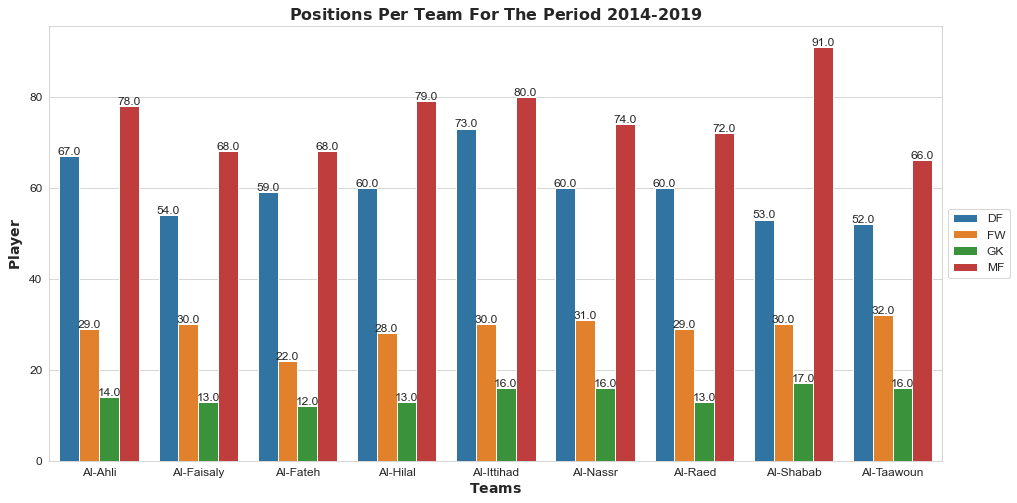

In [69]:
pos_df = (players[(players.Squad.isin(top_teams.Squad.unique()))]
.groupby(['Squad', 'Pos'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=pos_df, x='Squad', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('$Positions$ Per Team For The Period 2014-2019', fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Teams$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

#### 16- Total number of positions per team per year

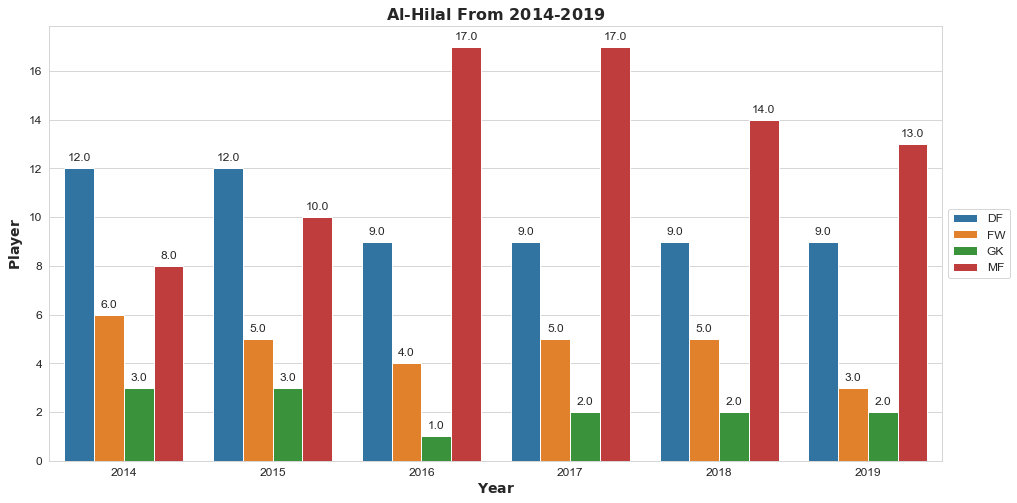

In [70]:
t = top_teams.Squad.unique()[0]
df = (players[(players.Squad == t)]
.groupby(['Squad', 'Pos','year'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=df, x='year', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('{} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

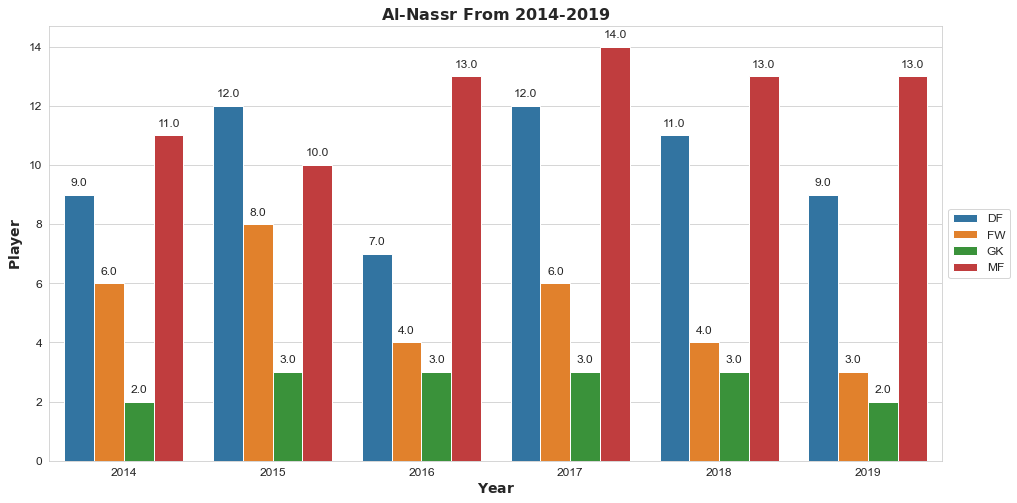

In [71]:
t = top_teams.Squad.unique()[1]
df = (players[(players.Squad == t)]
.groupby(['Squad', 'Pos','year'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=df, x='year', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('{} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

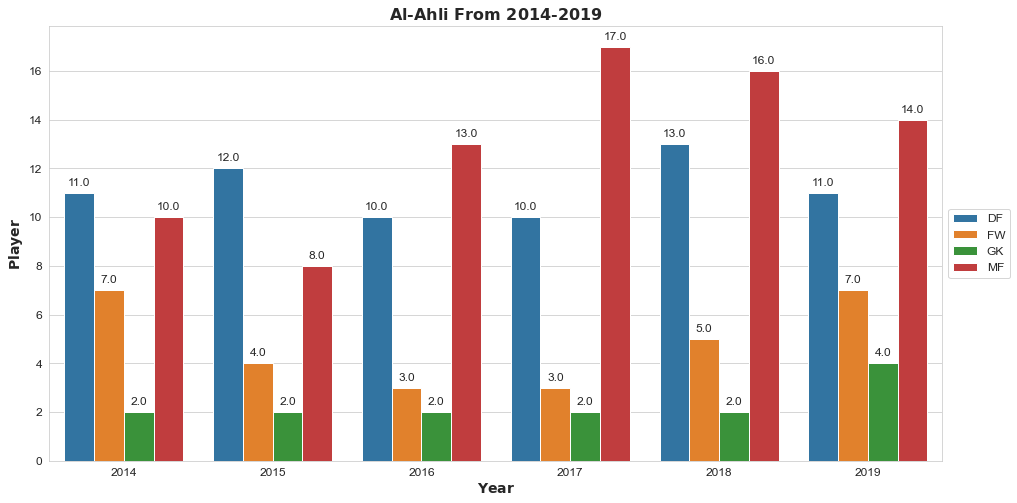

In [72]:
t = top_teams.Squad.unique()[2]
df = (players[(players.Squad == t)]
.groupby(['Squad', 'Pos','year'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=df, x='year', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('{} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

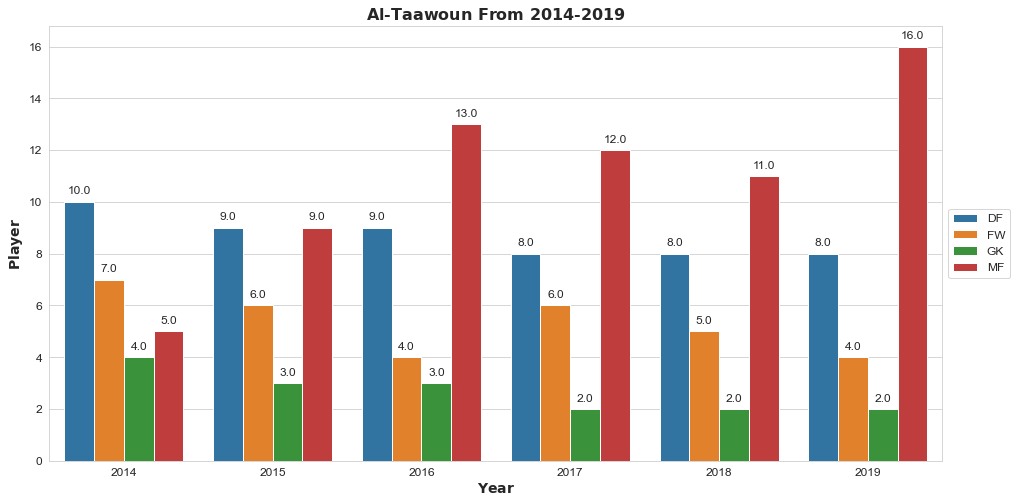

In [73]:
t = top_teams.Squad.unique()[3]
df = (players[(players.Squad == t)]
.groupby(['Squad', 'Pos','year'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=df, x='year', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('{} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

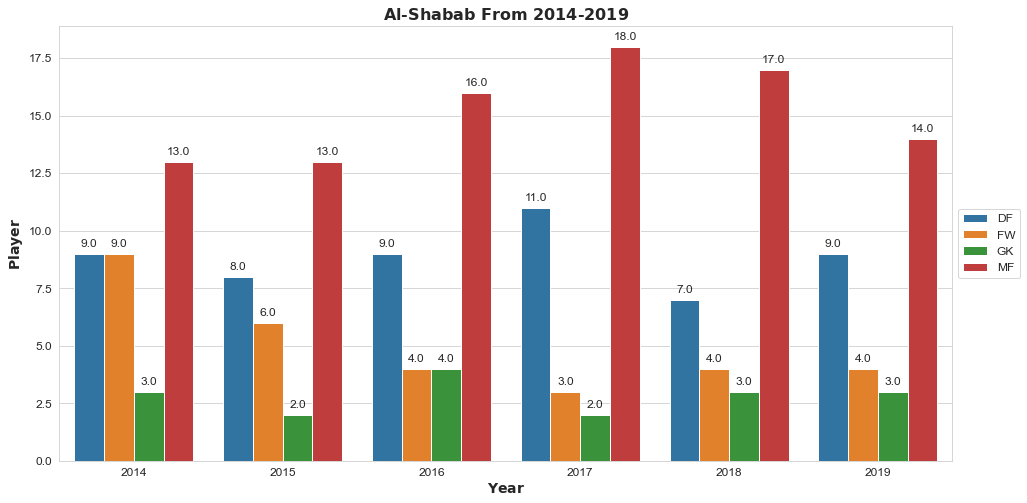

In [74]:
t = top_teams.Squad.unique()[4]
df = (players[(players.Squad == t)]
.groupby(['Squad', 'Pos','year'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=df, x='year', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('{} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

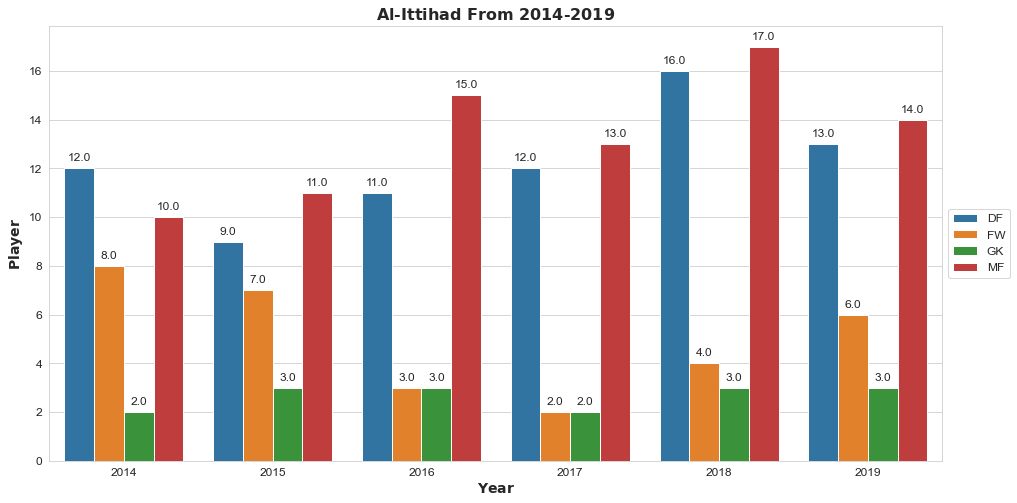

In [75]:
t = top_teams.Squad.unique()[5]
df = (players[(players.Squad == t)]
.groupby(['Squad', 'Pos','year'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=df, x='year', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('{} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

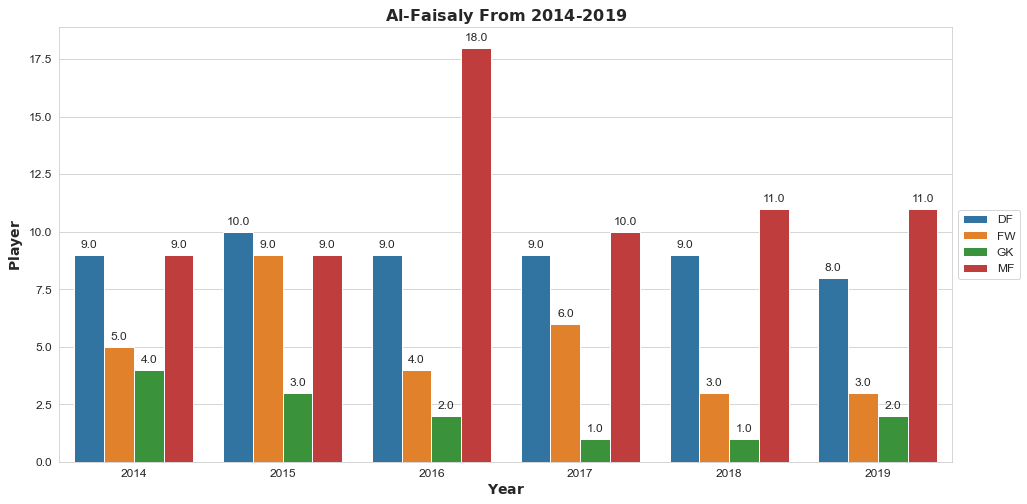

In [76]:
t = top_teams.Squad.unique()[6]
df = (players[(players.Squad == t)]
.groupby(['Squad', 'Pos','year'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=df, x='year', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('{} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

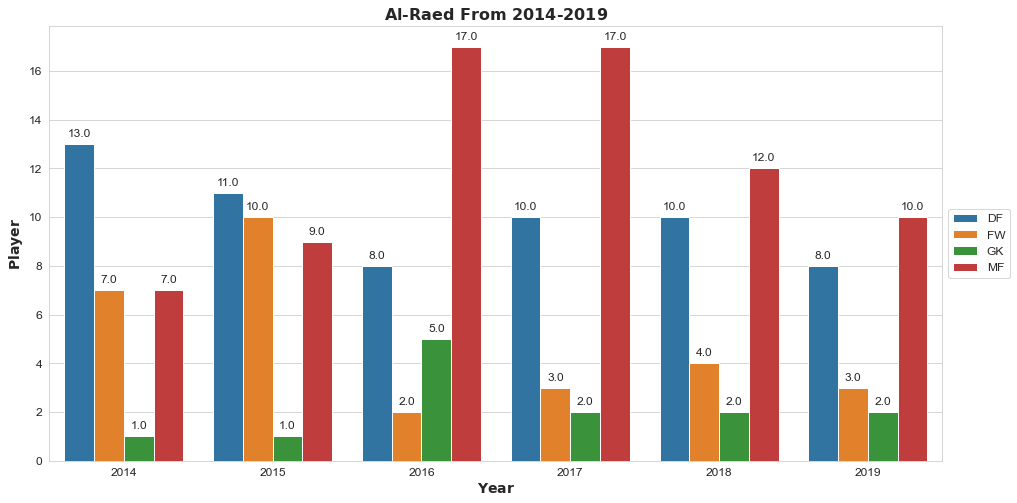

In [77]:
t = top_teams.Squad.unique()[7]
df = (players[(players.Squad == t)]
.groupby(['Squad', 'Pos','year'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=df, x='year', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('{} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

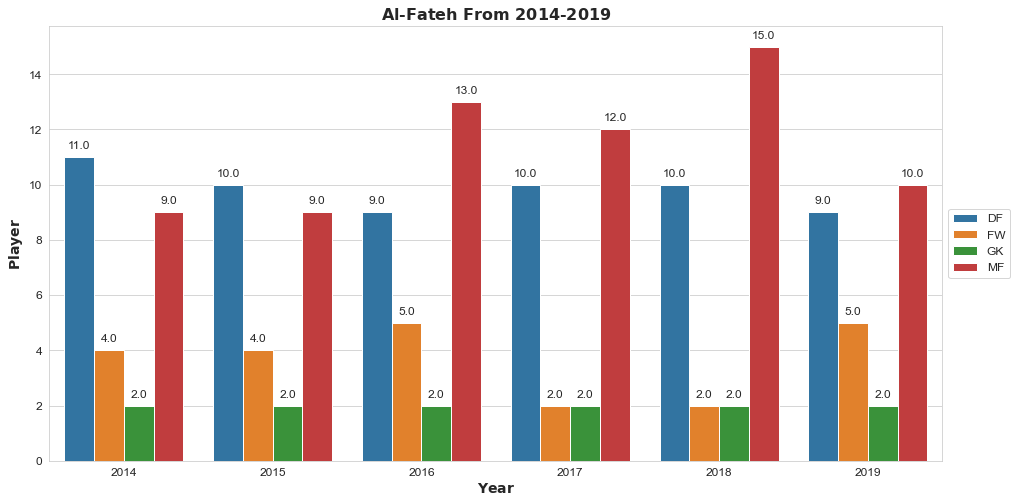

In [78]:
t = top_teams.Squad.unique()[8]
df = (players[(players.Squad == t)]
.groupby(['Squad', 'Pos','year'], as_index=False)['Player']
 .count())

aa = sns.barplot(data=df, x='year', y='Player', hue='Pos', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('{} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Player$ ', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.legend(title='',loc='center left', bbox_to_anchor=(1, 0.5));

#### 17- Total number of penalties per team per year

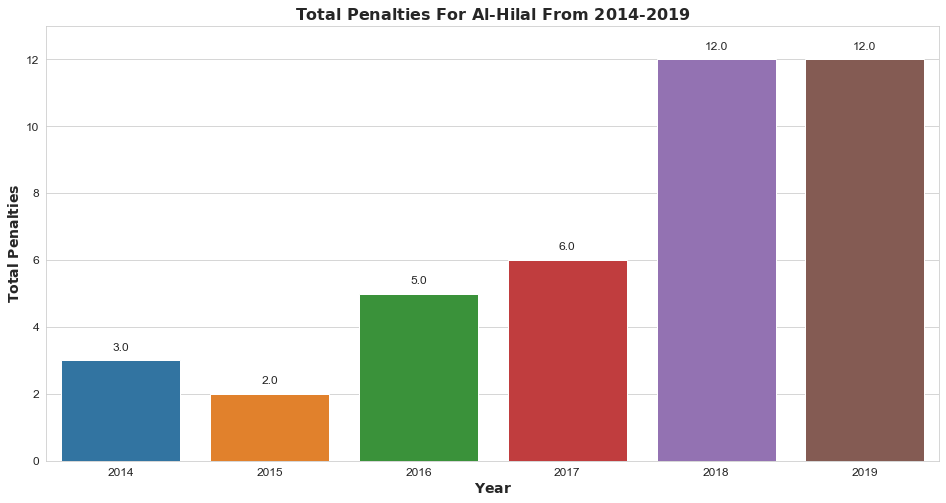

In [79]:
t = top_teams.Squad.unique()[0]
df = (players[(players.Squad == t)]
.groupby(['Squad','year'], as_index=False)['PK']
 .sum())

aa = sns.barplot(data=df, x='year', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For {} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.ylim(0, max(df.PK)+1);

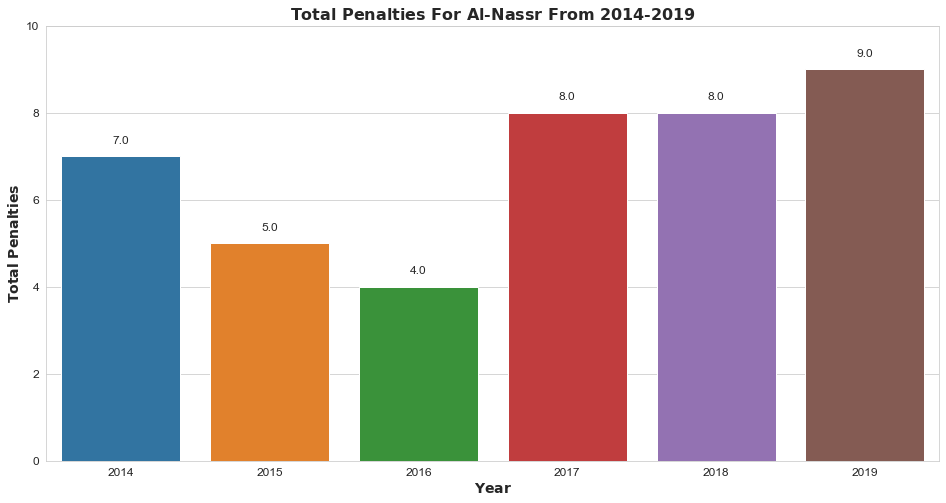

In [80]:
t = top_teams.Squad.unique()[1]
df = (players[(players.Squad == t)]
.groupby(['Squad','year'], as_index=False)['PK']
 .sum())

aa = sns.barplot(data=df, x='year', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For {} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.ylim(0, max(df.PK)+1);

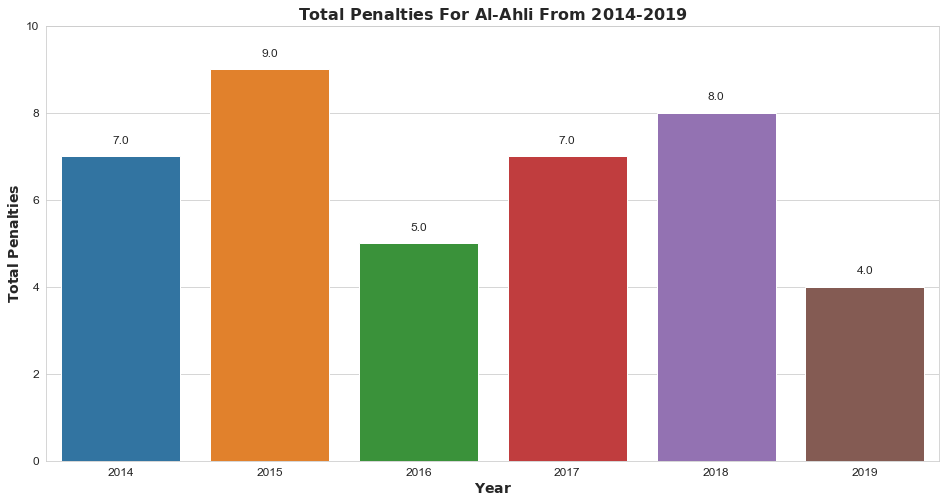

In [81]:
t = top_teams.Squad.unique()[2]
df = (players[(players.Squad == t)]
.groupby(['Squad','year'], as_index=False)['PK']
 .sum())

aa = sns.barplot(data=df, x='year', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For {} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.ylim(0, max(df.PK)+1);

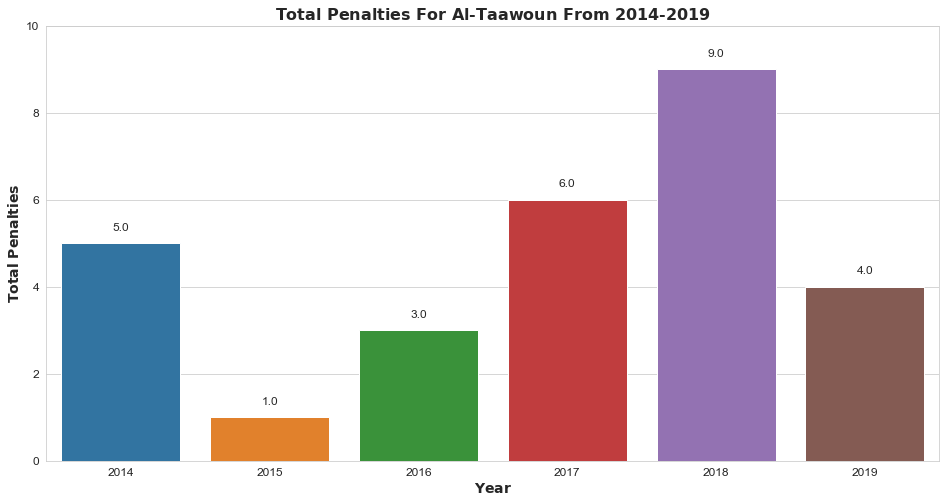

In [82]:
t = top_teams.Squad.unique()[3]
df = (players[(players.Squad == t)]
.groupby(['Squad','year'], as_index=False)['PK']
 .sum())

aa = sns.barplot(data=df, x='year', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For {} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.ylim(0, max(df.PK)+1);

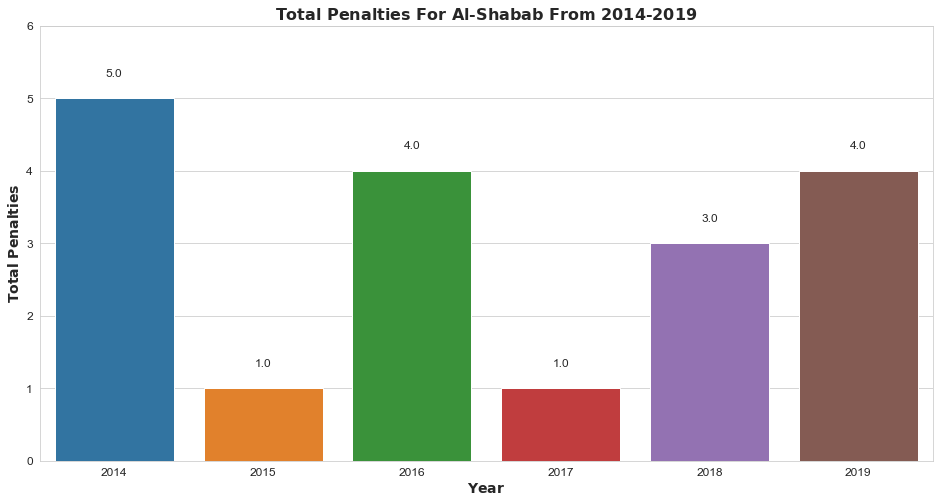

In [83]:
t = top_teams.Squad.unique()[4]
df = (players[(players.Squad == t)]
.groupby(['Squad','year'], as_index=False)['PK']
 .sum())

aa = sns.barplot(data=df, x='year', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For {} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.ylim(0, max(df.PK)+1);

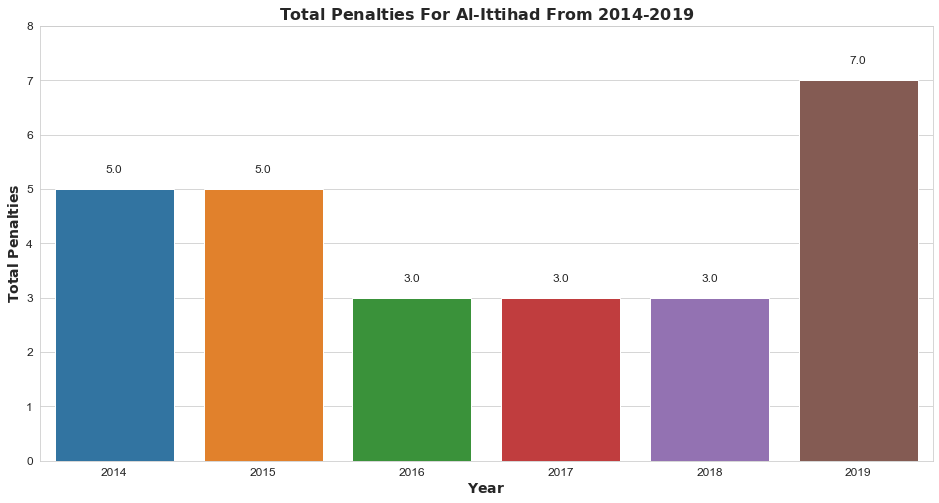

In [84]:
t = top_teams.Squad.unique()[5]
df = (players[(players.Squad == t)]
.groupby(['Squad','year'], as_index=False)['PK']
 .sum())

aa = sns.barplot(data=df, x='year', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For {} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.ylim(0, max(df.PK)+1);

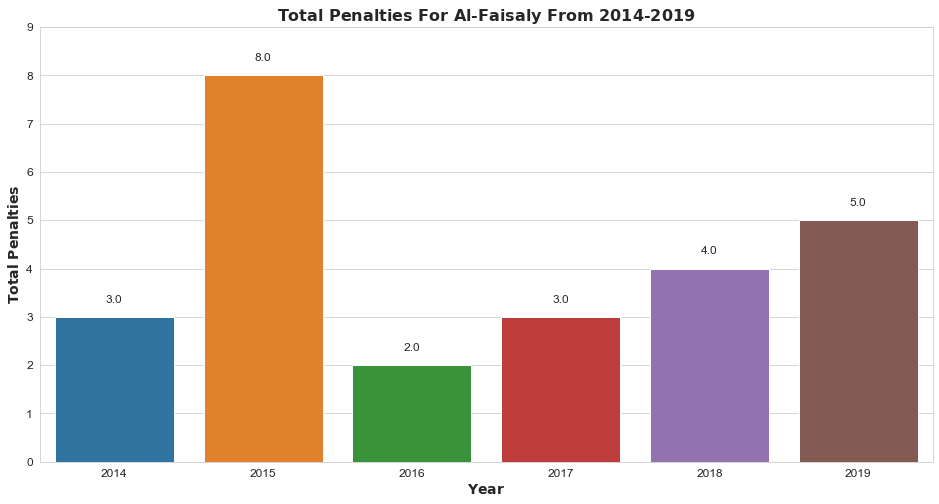

In [85]:
t = top_teams.Squad.unique()[6]
df = (players[(players.Squad == t)]
.groupby(['Squad','year'], as_index=False)['PK']
 .sum())

aa = sns.barplot(data=df, x='year', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For {} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.ylim(0, max(df.PK)+1);

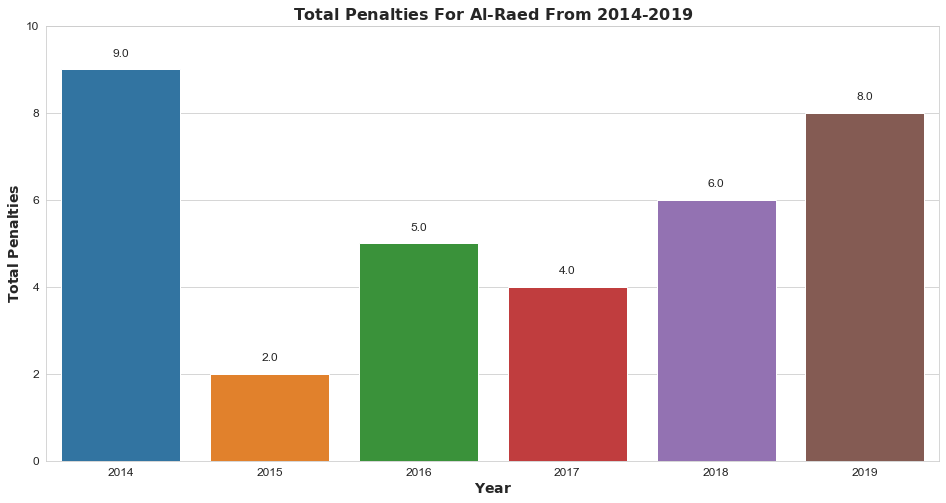

In [86]:
t = top_teams.Squad.unique()[7]
df = (players[(players.Squad == t)]
.groupby(['Squad','year'], as_index=False)['PK']
 .sum())

aa = sns.barplot(data=df, x='year', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For {} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.ylim(0, max(df.PK)+1);

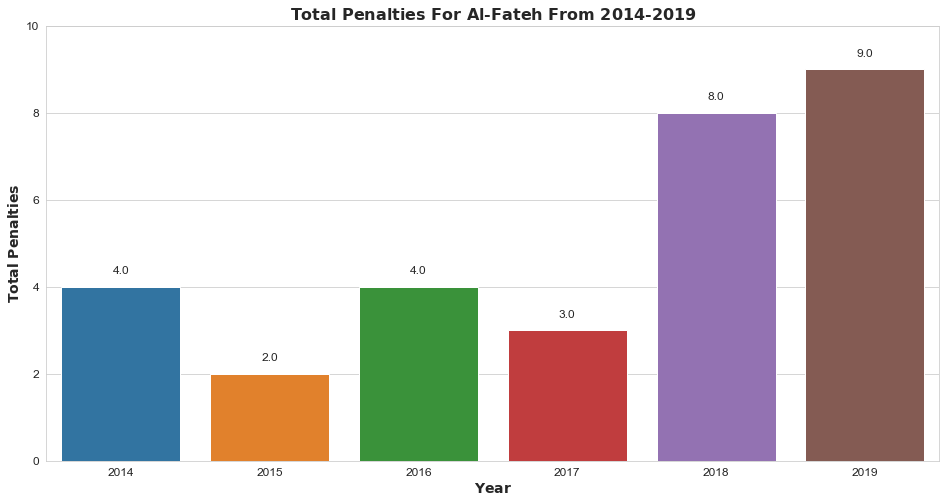

In [87]:
t = top_teams.Squad.unique()[8]
df = (players[(players.Squad == t)]
.groupby(['Squad','year'], as_index=False)['PK']
 .sum())

aa = sns.barplot(data=df, x='year', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For {} $From$ 2014-2019'.format(t), fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Year$', fontsize=14);
plt.ylim(0, max(df.PK)+1);

#### 18-Total number of penalties per team 2014 - 2019

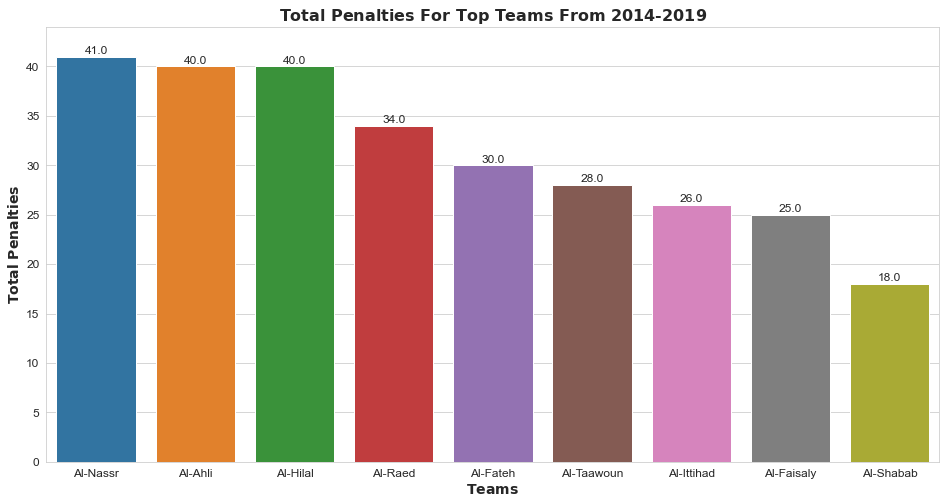

In [88]:
df = (players[(players.Squad.isin(top_teams.Squad.unique()))]
.groupby('Squad', as_index=False)['PK']
 .sum()
.sort_values(by='PK', ascending=False))

aa = sns.barplot(data=df, x='Squad', y='PK', palette='tab10');
show_values_on_bars(aa, 'v', 0.3);
plt.title('Total Penalties For Top Teams $From$ 2014-2019', fontsize=16);
plt.ylabel('$Total$ Penalties', fontsize=14);
plt.xlabel('$Teams$', fontsize=14);
plt.ylim(0, max(df.PK)+3);

## 4- Save Data 

In [89]:
# Extract data and join it in one data frame
pk_df = (players[players.Squad.isin(top_teams.Squad.unique())]
.groupby(['Squad','year'], as_index=False)['PK']
.sum())

# Minutes Played per team per year
min_df = (players[players.Squad.isin(top_teams.Squad.unique())]
.groupby(['Squad','year'], as_index=False)['Min']
.sum())

# Positions per team per year
pos_df = (players[players.Squad.isin(top_teams.Squad.unique())]
 .groupby(['Squad','year','Pos'], as_index=False)['Player']
.count())

# Average age per team per year
ag_df = (players[players.Squad.isin(top_teams.Squad.unique())]
.groupby(['Squad','year'], as_index=False)['Age']
.mean())

# Number of Saudi and non-Saudi players per team per year
pp = pd.DataFrame(columns=['year','Squad','KSA player','Non KSA player'])
for t in top_teams.Squad.unique():
    df, _ = get_nationality_per_team(t)
    plt.close();
    df = df.groupby(['year','Nation'], as_index=False)['Player'].sum()
    ksap = df[df.Nation == 'KSA'][['year', 'Player']]
    nksa = df[df.Nation != 'KSA'].groupby(['year'], as_index=False).sum()
    for y in df.year.unique():
        k1 = ksap[ksap.year==y]['Player'].values[0]
        k2 = nksa[nksa.year==y]['Player'].values[0]
        pp = pp.append({'year':y,'Squad':t,'KSA player':k1,'Non KSA player':k2}, ignore_index=True)

# Join data
top_teams[['Pk', 'Min', 'Age', 'n_FW', 'n_MF', 'n_DF', 'n_GK','n_S','n_nS']] = pd.DataFrame([[0,0,0,0,0,0,0,0,0]], index=top_teams.index)
df_new = pd.DataFrame(columns=top_teams.columns)
for ind, row in top_teams.iterrows():
    
    t = row['Squad']
    y = row['year']
    row['Pk'] = pk_df[(pk_df.year == y) & (pk_df.Squad == t)]['PK'].values[0]
    row['Min'] = min_df[(min_df.year == y) & (min_df.Squad == t)]['Min'].values[0]
    row['Age'] =  ag_df[(ag_df.year == y) & (ag_df.Squad == t)]['Age'].values[0]
    row['n_FW'] =  pos_df[(pos_df.year == y) & (pos_df.Squad == t) & (pos_df.Pos == 'FW')]['Player'].values[0]
    row['n_MF'] =  pos_df[(pos_df.year == y) & (pos_df.Squad == t) & (pos_df.Pos == 'MF')]['Player'].values[0]
    row['n_DF'] =  pos_df[(pos_df.year == y) & (pos_df.Squad == t) & (pos_df.Pos == 'DF')]['Player'].values[0]
    row['n_GK'] =  pos_df[(pos_df.year == y) & (pos_df.Squad == t) & (pos_df.Pos == 'GK')]['Player'].values[0]
    row['n_S'] =  pp[(pp.year == y) & (pp.Squad == t)]['KSA player'].values[0]
    row['n_nS'] =  pp[(pp.year == y) & (pp.Squad == t)]['Non KSA player'].values[0]
    df_new = df_new.append(row, ignore_index=True)
    
df_new.head()

year Rk     Squad  MP   W  D  L  GF  GA GDiff  ... Top Team Scorer Goals  \
0  2019  1  Al-Hilal  30  22  6  2  74  26    48  ...                    27   
1  2018  1  Al-Nassr  30  22  4  4  69  27    42  ...                    34   
2  2018  2  Al-Hilal  30  21  6  3  66  33    33  ...                    21   
3  2016  1  Al-Hilal  26  21  3  2  63  16    47  ...                    12   
4  2014  1  Al-Nassr  26  20  4  2  62  20    42  ...                    21   

   Pk    Min        Age n_FW n_MF n_DF n_GK  n_S n_nS  
0  12  29691  27.259259    3   13    9    2   20    7  
1   8  29648  26.193548    4   13   11    3   22    9  
2  12  29634  27.233333    5   14    9    2   19   11  
3   5  25668  25.483871    4   17    9    1   25    6  
4   7  25621  26.571429    6   11    9    2   22    6  

[5 rows x 25 columns]

In [90]:
# Drop unnecessary columns
data = df_new.copy()
data.drop(['Goalkeeper','Notes', 'Top Team Scorer', 'Top Team Scorer Goals'],axis=1, inplace=True)
data.head()

year Rk     Squad  MP   W  D  L  GF  GA GDiff  ... Attendance  Pk    Min  \
0  2019  1  Al-Hilal  30  22  6  2  74  26    48  ...      10683  12  29691   
1  2018  1  Al-Nassr  30  22  4  4  69  27    42  ...      16408   8  29648   
2  2018  2  Al-Hilal  30  21  6  3  66  33    33  ...      19551  12  29634   
3  2016  1  Al-Hilal  26  21  3  2  63  16    47  ...      15387   5  25668   
4  2014  1  Al-Nassr  26  20  4  2  62  20    42  ...      19579   7  25621   

         Age  n_FW n_MF n_DF n_GK n_S n_nS  
0  27.259259     3   13    9    2  20    7  
1  26.193548     4   13   11    3  22    9  
2  27.233333     5   14    9    2  19   11  
3  25.483871     4   17    9    1  25    6  
4  26.571429     6   11    9    2  22    6  

[5 rows x 21 columns]

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        54 non-null     object 
 1   Rk          54 non-null     object 
 2   Squad       54 non-null     object 
 3   MP          54 non-null     object 
 4   W           54 non-null     object 
 5   D           54 non-null     object 
 6   L           54 non-null     object 
 7   GF          54 non-null     object 
 8   GA          54 non-null     object 
 9   GDiff       54 non-null     object 
 10  Pts         54 non-null     object 
 11  Attendance  54 non-null     object 
 12  Pk          54 non-null     object 
 13  Min         54 non-null     object 
 14  Age         54 non-null     float64
 15  n_FW        54 non-null     object 
 16  n_MF        54 non-null     object 
 17  n_DF        54 non-null     object 
 18  n_GK        54 non-null     object 
 19  n_S         54 non-null     obj

In [92]:
# Change data type for columns
convert_dict = {'year':int, 'Rk':int, 'MP':int, 'W':int, 'D':int, 'L':int, 'GF':int, 'GA':int, 'GDiff':int, 'Pts':int,
       'Attendance':int, 'Pk':int, 'Min':int, 'Age':int, 'n_FW':int, 'n_MF':int, 'n_DF':int, 'n_GK':int,
               'n_S':int,'n_nS':int} 
  
data = data.astype(convert_dict) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        54 non-null     int32 
 1   Rk          54 non-null     int32 
 2   Squad       54 non-null     object
 3   MP          54 non-null     int32 
 4   W           54 non-null     int32 
 5   D           54 non-null     int32 
 6   L           54 non-null     int32 
 7   GF          54 non-null     int32 
 8   GA          54 non-null     int32 
 9   GDiff       54 non-null     int32 
 10  Pts         54 non-null     int32 
 11  Attendance  54 non-null     int32 
 12  Pk          54 non-null     int32 
 13  Min         54 non-null     int32 
 14  Age         54 non-null     int32 
 15  n_FW        54 non-null     int32 
 16  n_MF        54 non-null     int32 
 17  n_DF        54 non-null     int32 
 18  n_GK        54 non-null     int32 
 19  n_S         54 non-null     int32 
 20  n_nS        

In [93]:
data.to_csv('cleaned.csv', index=False)